# Mentorias 2022 - M17 - Grupo 1 - Entregable 2

**Integrantes:** Abdala A. - Acosta M. - Ramos M.

Consignas Entrega **29/07.**

Práctico aprendizaje supervisado. Definir un modelo simple para utilizarlo de baseline e ir complejizando el modelo con la adición de diferentes variables. Se propondrá la utilización de los algoritmos de red para desarrollar features de interés a partir de las informaciones geográficas. El objetivo es implementar en este caso un sistema predictivo de calidad de servicio 

#Carga de Modulos e Ingesta de Datos

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import plotly.express as px
import missingno as msno

In [ ]:
#Files
!wget https://raw.githubusercontent.com/concientizar/Diplomatura2022/main/file20201101_mes.zip -O /content/file_mensual.zip
!wget https://raw.githubusercontent.com/agustinabdala/diplodatos/main/00_Mentoria/merged_temperatures_smn.txt -O /content/temperatures_smn.txt

--2022-08-05 15:47:20--  https://raw.githubusercontent.com/concientizar/Diplomatura2022/main/file20201101_mes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12035448 (11M) [application/zip]
Saving to: ‘/content/file_mensual.zip’

/content/file_mensu 100%[===================>]  11.48M  --.-KB/s    in 0.05s   

2022-08-05 15:47:20 (241 MB/s) - ‘/content/file_mensual.zip’ saved [12035448/12035448]

--2022-08-05 15:47:20--  https://raw.githubusercontent.com/agustinabdala/diplodatos/main/00_Mentoria/merged_temperatures_smn.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP reque

In [ ]:
!unzip -o /content/file_mensual.zip

Archive:  /content/file_mensual.zip
  inflating: file20201101_mes.csv    


##Leemos los archivos CSV

In [ ]:
file_input = "file20201101_mes.csv"
df_1 = pandas.read_csv(file_input)

##Analisis del Df

Como actividad inicial vamos a identificar las columnas del df y el tipo de datos de cada una

In [ ]:
df_1.columns

Index(['Active_Energy_Delivered', 'Active_Energy_LastDay',
       'Active_Energy_Received', 'Active_Energy_del_m_rec',
       'Active_Energy_del_p_rec', 'Active_Power_A', 'Active_Power_B',
       'Active_Power_C', 'Active_Power_Total', 'Apparent_Energy_Delivered',
       'Apparent_Energy_Received', 'Apparent_Energy_del_p_rec',
       'Apparent_Power_A', 'Apparent_Power_B', 'Apparent_Power_C',
       'Apparent_Power_Total', 'Current_A', 'Current_Avg', 'Current_B',
       'Current_C', 'Current_G', 'Current_N', 'Current_UNB_A', 'Current_UNB_B',
       'Current_UNB_C', 'Current_UNB_Worst', 'Energy_Acum_Datetime',
       'Frequency', 'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Reactive_Energy_Delivered',
       'Reactive_Energy_Received', 'Reactive_Energy_del_m_rec',
       'Reactive_Energy_del_p_rec', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Temperature',
       'Voltage_A_B', 'Voltage_A_N', 'Voltage

In [ ]:
df_1.dtypes

Active_Energy_Delivered    float64
Active_Energy_LastDay      float64
Active_Energy_Received     float64
Active_Energy_del_m_rec    float64
Active_Energy_del_p_rec    float64
                            ...   
createdAt                   object
rsrv1                        int64
rsrv2                        int64
rsrv3                        int64
rsrv4                        int64
Length: 62, dtype: object

Contamos el # de Columnas del df

In [ ]:
shape = df_1.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])

Number of columns : 62


Asignamos el formato de datetime a la Columna "CreatedAt"

In [ ]:
#df_1['createdAt'] = df_1['createdAt'].str.replace('T', ' ')
#df_1['createdAt'] = df_1['createdAt'].str.replace('Z', '')
df_1.index = pandas.to_datetime(df_1['createdAt'],infer_datetime_format=True)

Analizamos los 5 primeros y ultimos datos del df para comenzar a familiarizarnos con los datos del dataset

In [ ]:
pandas.set_option('display.max_columns', None)
df_1.head()

Active_Energy_Delivered  \
createdAt                                                   
2020-11-30 00:00:12.342000+00:00                106852.29   
2020-11-30 00:00:22.759000+00:00                106852.29   
2020-11-30 00:00:39.117000+00:00                106852.29   
2020-11-30 00:00:48.160000+00:00                106852.32   
2020-11-30 00:00:58.693000+00:00                106852.33   

                                  Active_Energy_LastDay  \
createdAt                                                 
2020-11-30 00:00:12.342000+00:00                   3.81   
2020-11-30 00:00:22.759000+00:00                   3.81   
2020-11-30 00:00:39.117000+00:00                   3.81   
2020-11-30 00:00:48.160000+00:00                   3.81   
2020-11-30 00:00:58.693000+00:00                   3.81   

                                  Active_Energy_Received  \
createdAt                                                  
2020-11-30 00:00:12.342000+00:00                  362.77   
2020-11-30 00:00:22.759000+00:00                  362.77   
2020-11-30 00:00:39.117000+00:00                  362.77   
2020-11-30 00:00:48.160000+00:00                  362.77   
2020-11-30 00:00:58.693000+00:00                  362.77   

                                  Active_Energy_del_m_rec  \
createdAt                                                   
2020-11-30 00:00:12.342000+00:00                106489.52   
2020-11-30 00:00:22.759000+00:00                106489.52   
2020-11-30 00:00:39.117000+00:00                106489.52   
2020-11-30 00:00:48.160000+00:00                106489.55   
2020-11-30 00:00:58.693000+00:00                106489.55   

                                  Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                                   
2020-11-30 00:00:12.342000+00:00                107215.05            2.00   
2020-11-30 00:00:22.759000+00:00                107215.05            2.00   
2020-11-30 00:00:39.117000+00:00                107215.05            2.00   
2020-11-30 00:00:48.160000+00:00                107215.09            2.00   
2020-11-30 00:00:58.693000+00:00                107215.10            1.81   

                                  Active_Power_B  Active_Power_C  \
createdAt                                                          
2020-11-30 00:00:12.342000+00:00            0.31            0.94   
2020-11-30 00:00:22.759000+00:00            0.30            0.94   
2020-11-30 00:00:39.117000+00:00            0.30            0.94   
2020-11-30 00:00:48.160000+00:00            0.30            0.94   
2020-11-30 00:00:58.693000+00:00            0.29            0.94   

                                  Active_Power_Total  \
createdAt                                              
2020-11-30 00:00:12.342000+00:00                3.25   
2020-11-30 00:00:22.759000+00:00                3.24   
2020-11-30 00:00:39.117000+00:00                3.24   
2020-11-30 00:00:48.160000+00:00                3.25   
2020-11-30 00:00:58.693000+00:00                3.05   

                                  Apparent_Energy_Delivered  \
createdAt                                                     
2020-11-30 00:00:12.342000+00:00                  138069.09   
2020-11-30 00:00:22.759000+00:00                  138069.11   
2020-11-30 00:00:39.117000+00:00                  138069.12   
2020-11-30 00:00:48.160000+00:00                  138069.14   
2020-11-30 00:00:58.693000+00:00                  138069.14   

                                  Apparent_Energy_Received  \
createdAt                                                    
2020-11-30 00:00:12.342000+00:00                    906.87   
2020-11-30 00:00:22.759000+00:00                    906.87   
2020-11-30 00:00:39.117000+00:00                    906.87   
2020-11-30 00:00:48.160000+00:00                    906.87   
2020-11-30 00:00:58.693000+00:00                    906.87   

                                  Apparent_Energy_del_p_

In [ ]:
df_1.tail()

Active_Energy_Delivered  \
createdAt                                                   
2020-11-01 23:58:06.425000+00:00                 95656.45   
2020-11-01 23:58:18.775000+00:00                 95656.45   
2020-11-01 23:58:29.311000+00:00                 95656.47   
2020-11-01 23:59:02.412000+00:00                 95656.49   
2020-11-01 23:59:35.683000+00:00                 95656.52   

                                  Active_Energy_LastDay  \
createdAt                                                 
2020-11-01 23:58:06.425000+00:00                   3.77   
2020-11-01 23:58:18.775000+00:00                   3.77   
2020-11-01 23:58:29.311000+00:00                   3.77   
2020-11-01 23:59:02.412000+00:00                   3.77   
2020-11-01 23:59:35.683000+00:00                   3.77   

                                  Active_Energy_Received  \
createdAt                                                  
2020-11-01 23:58:06.425000+00:00                  362.76   
2020-11-01 23:58:18.775000+00:00                  362.76   
2020-11-01 23:58:29.311000+00:00                  362.76   
2020-11-01 23:59:02.412000+00:00                  362.76   
2020-11-01 23:59:35.683000+00:00                  362.76   

                                  Active_Energy_del_m_rec  \
createdAt                                                   
2020-11-01 23:58:06.425000+00:00                 95293.70   
2020-11-01 23:58:18.775000+00:00                 95293.70   
2020-11-01 23:58:29.311000+00:00                 95293.71   
2020-11-01 23:59:02.412000+00:00                 95293.73   
2020-11-01 23:59:35.683000+00:00                 95293.77   

                                  Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                                   
2020-11-01 23:58:06.425000+00:00                 96019.21            1.83   
2020-11-01 23:58:18.775000+00:00                 96019.21            1.83   
2020-11-01 23:58:29.311000+00:00                 96019.23            1.83   
2020-11-01 23:59:02.412000+00:00                 96019.26            1.83   
2020-11-01 23:59:35.683000+00:00                 96019.28            1.83   

                                  Active_Power_B  Active_Power_C  \
createdAt                                                          
2020-11-01 23:58:06.425000+00:00            0.32             0.8   
2020-11-01 23:58:18.775000+00:00            0.32             0.8   
2020-11-01 23:58:29.311000+00:00            0.32             0.8   
2020-11-01 23:59:02.412000+00:00            0.32             0.8   
2020-11-01 23:59:35.683000+00:00            0.32             0.8   

                                  Active_Power_Total  \
createdAt                                              
2020-11-01 23:58:06.425000+00:00                2.95   
2020-11-01 23:58:18.775000+00:00                2.95   
2020-11-01 23:58:29.311000+00:00                2.95   
2020-11-01 23:59:02.412000+00:00                2.95   
2020-11-01 23:59:35.683000+00:00                2.95   

                                  Apparent_Energy_Delivered  \
createdAt                                                     
2020-11-01 23:58:06.425000+00:00                  122900.67   
2020-11-01 23:58:18.775000+00:00                  122900.68   
2020-11-01 23:58:29.311000+00:00                  122900.69   
2020-11-01 23:59:02.412000+00:00                  122900.71   
2020-11-01 23:59:35.683000+00:00                  122900.74   

                                  Apparent_Energy_Received  \
createdAt                                                    
2020-11-01 23:58:06.425000+00:00                    906.69   
2020-11-01 23:58:18.775000+00:00                    906.69   
2020-11-01 23:58:29.311000+00:00                    906.69   
2020-11-01 23:59:02.412000+00:00                    906.69   
2020-11-01 23:59:35.683000+00:00                    906.69   

                                  Apparent_Energy_del_p_

Realizamos un vistazo a las columnas de Corriente Y Potencias por Fase

In [ ]:
df_1[['Current_A','Current_B','Current_C','Current_N','Current_G','Current_Avg','Active_Power_A','Active_Power_B','Active_Power_C','Active_Power_Total']].describe()

Current_A      Current_B      Current_C      Current_N  Current_G  \
count  212236.000000  212236.000000  212236.000000  212236.000000   212236.0   
mean       36.558676      26.102234      26.105825      13.312425       13.0   
std        44.890259      42.311257      40.590581       8.683844        0.0   
min         3.730000       1.480000       0.520000       1.470000       13.0   
25%        10.200000       1.910000       3.860000       6.940000       13.0   
50%        13.190000       2.410000       4.360000       9.770000       13.0   
75%        33.742500      26.160000      21.480000      18.440000       13.0   
max       240.400000     219.060000     208.780000      56.910000       13.0   

       Current_Avg  Active_Power_A  Active_Power_B  Active_Power_C  \
count     212236.0   212236.000000   212236.000000   212236.000000   
mean           0.0        6.356606        4.269859        4.256250   
std            0.0        7.201076        6.775799        6.220009   
min            0.0        0.640000        0.280000        0.090000   
25%            0.0        2.020000        0.350000        0.800000   
50%            0.0        2.720000        0.440000        0.990000   
75%            0.0        6.460000        4.900000        3.630000   
max            0.0       37.840000       34.070000       33.200000   

       Active_Power_Total  
count       212236.000000  
mean            14.882748  
std             20.136581  
min              1.050000  
25%              3.350000  
50%              4.290000  
75%             14.800000  
max            104.980000

Las variables **Current_G y Current AVG** poseen valores constantes que no serian significativos para nuestro análisis. Un estudio más detallado del comportamiento de este datapoint es necesario para ver si es completamente descartado.

###Detección las variables con valor cero del dataset

1.   Elemento de lista

      Verificamos la cantidad de valores cero en cada una de las columnas

In [ ]:
#Columnas con valores 0
cols = df_1[df_1 == 0].count(axis=0)
cols[cols > 0]

Current_Avg             212236
Current_UNB_Worst       212236
Energy_Acum_Datetime    212236
Reactive_Power_Total        58
rsrv1                   212236
rsrv2                   212236
rsrv3                   212236
rsrv4                   212236
dtype: int64


###Reconocimiento de datos faltantes




In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212236 entries, 2020-11-30 00:00:12.342000+00:00 to 2020-11-01 23:59:35.683000+00:00
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Active_Energy_Delivered    212236 non-null  float64
 1   Active_Energy_LastDay      212236 non-null  float64
 2   Active_Energy_Received     212236 non-null  float64
 3   Active_Energy_del_m_rec    212236 non-null  float64
 4   Active_Energy_del_p_rec    212236 non-null  float64
 5   Active_Power_A             212236 non-null  float64
 6   Active_Power_B             212236 non-null  float64
 7   Active_Power_C             212236 non-null  float64
 8   Active_Power_Total         212236 non-null  float64
 9   Apparent_Energy_Delivered  212236 non-null  float64
 10  Apparent_Energy_Received   212236 non-null  float64
 11  Apparent_Energy_del_p_rec  212236 non-null  int64  
 12  Apparent_Power_A          

In [ ]:
missing_values_count = df_1.isna().sum()
missing_values_count

Active_Energy_Delivered    0
Active_Energy_LastDay      0
Active_Energy_Received     0
Active_Energy_del_m_rec    0
Active_Energy_del_p_rec    0
                          ..
createdAt                  0
rsrv1                      0
rsrv2                      0
rsrv3                      0
rsrv4                      0
Length: 62, dtype: int64

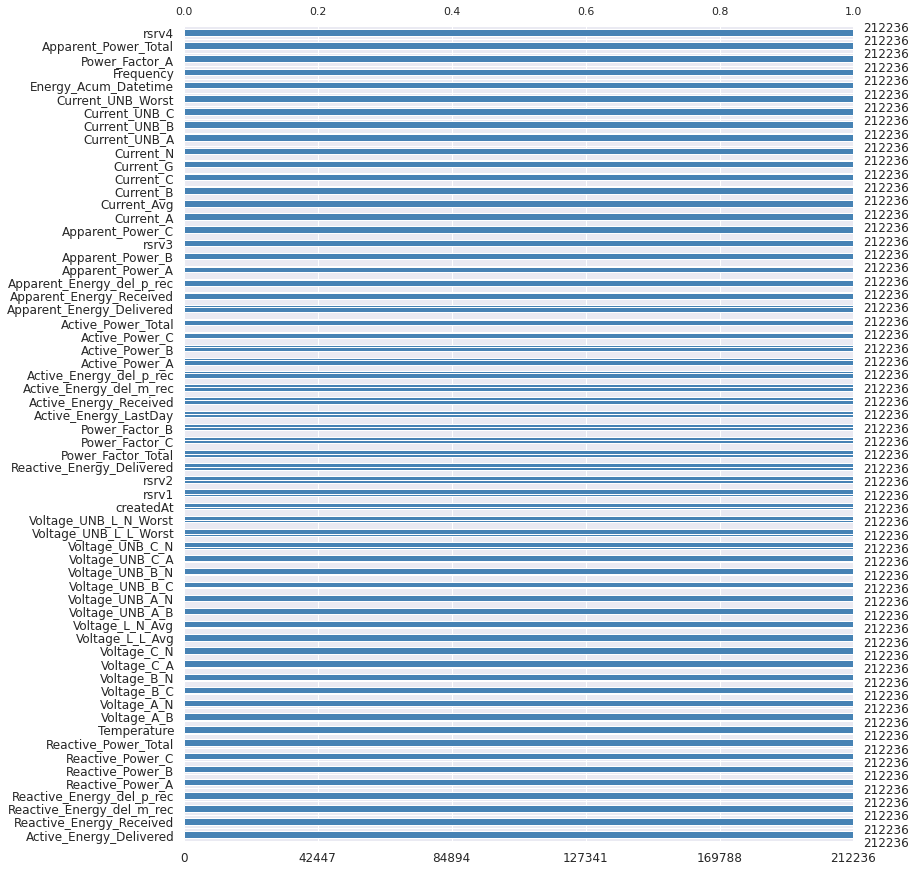

In [ ]:
msno.bar(df_1,figsize=(12, 15), sort="ascending",fontsize=12, color='steelblue')

### GROUP BY

In [ ]:
# Hour - mean
df_1_groupby_hour = df_1.groupby(pandas.Grouper(freq='H')).mean()
df_1_groupby_hour.head()

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                                   
2020-11-01 00:00:00+00:00             95581.195863               3.877883   
2020-11-01 01:00:00+00:00             95585.030839               3.757871   
2020-11-01 02:00:00+00:00             95588.659649               3.556581   
2020-11-01 03:00:00+00:00             95592.827138               4.472315   
2020-11-01 04:00:00+00:00             95596.590097               3.559416   

                           Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                                    
2020-11-01 00:00:00+00:00                  362.76             95218.438795   
2020-11-01 01:00:00+00:00                  362.76             95222.274387   
2020-11-01 02:00:00+00:00                  362.76             95225.902620   
2020-11-01 03:00:00+00:00                  362.76             95230.070482   
2020-11-01 04:00:00+00:00                  362.76             95233.833571   

                           Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                            
2020-11-01 00:00:00+00:00             95943.953029        2.681824   
2020-11-01 01:00:00+00:00             95947.787742        2.244065   
2020-11-01 02:00:00+00:00             95951.416613        2.307859   
2020-11-01 03:00:00+00:00             95955.583987        2.655981   
2020-11-01 04:00:00+00:00             95959.347175        2.299870   

                           Active_Power_B  Active_Power_C  Active_Power_Total  \
createdAt                                                                       
2020-11-01 00:00:00+00:00        0.309055        0.947752            3.937590   
2020-11-01 01:00:00+00:00        0.338548        1.027258            3.612387   
2020-11-01 02:00:00+00:00        0.318658        0.982939            3.611438   
2020-11-01 03:00:00+00:00        0.507331        1.166624            4.329807   
2020-11-01 04:00:00+00:00        0.331169        1.012403            3.644805   

                           Apparent_Energy_Delivered  \
createdAt                                              
2020-11-01 00:00:00+00:00              122818.788567   
2020-11-01 01:00:00+00:00              122822.644484   
2020-11-01 02:00:00+00:00              122826.294377   
2020-11-01 03:00:00+00:00              122830.723601   
2020-11-01 04:00:00+00:00              122834.564448   

                           Apparent_Energy_Received  \
createdAt                                             
2020-11-01 00:00:00+00:00                    906.69   
2020-11-01 01:00:00+00:00                    906.69   
2020-11-01 02:00:00+00:00                    906.69   
2020-11-01 03:00:00+00:00                    906.69   
2020-11-01 04:00:00+00:00                    906.69   

                           Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                                
2020-11-01 00:00:00+00:00                        4.0          2.832541   
2020-11-01 01:00:00+00:00                        4.0          2.370871   
2020-11-01 02:00:00+00:00                        4.0          2.403802   
2020-11-01 03:00:00+00:00                        4.0          2.916913   
2020-11-01 04:00:00+00:00                        4.0          2.452110   

                           Apparent_Power_B  Apparent_Power_C  \
createdAt                                                       
2020-11-01 00:00:00+00:00          0.367655          1.030000   
2020-11-01 01:00:00+00:00          0.399516          1.071806   
2020-11-01 02:00:00+00:00          0.382556          1.056102   
2020-11-01 03:00:00+00:00          0.667074          1.214373   
2020-11-01 04:00:00+00:00          0.392857          1.079091   

                           Apparent_Power_Total  Current_A  Current_Avg  \
createdAt                                           

In [ ]:
# Minute - mean
df_1_groupby_minute_mean = df_1.groupby(pandas.Grouper(freq='MIN')).mean()
df_1_groupby_minute_mean.head()

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                                   
2020-11-01 00:00:00+00:00                95579.344                  3.866   
2020-11-01 00:01:00+00:00                95579.396                  3.970   
2020-11-01 00:02:00+00:00                95579.448                  3.970   
2020-11-01 00:03:00+00:00                95579.504                  3.970   
2020-11-01 00:04:00+00:00                95579.568                  3.970   

                           Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                                    
2020-11-01 00:00:00+00:00                  362.76                95216.588   
2020-11-01 00:01:00+00:00                  362.76                95216.638   
2020-11-01 00:02:00+00:00                  362.76                95216.692   
2020-11-01 00:03:00+00:00                  362.76                95216.746   
2020-11-01 00:04:00+00:00                  362.76                95216.802   

                           Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                            
2020-11-01 00:00:00+00:00                95942.098           2.356   
2020-11-01 00:01:00+00:00                95942.150           2.102   
2020-11-01 00:02:00+00:00                95942.210           2.100   
2020-11-01 00:03:00+00:00                95942.260           2.042   
2020-11-01 00:04:00+00:00                95942.320           1.894   

                           Active_Power_B  Active_Power_C  Active_Power_Total  \
createdAt                                                                       
2020-11-01 00:00:00+00:00           0.300            0.93               3.590   
2020-11-01 00:01:00+00:00           0.300            0.93               3.336   
2020-11-01 00:02:00+00:00           0.300            0.93               3.334   
2020-11-01 00:03:00+00:00           0.304            0.93               3.282   
2020-11-01 00:04:00+00:00           0.310            0.93               3.134   

                           Apparent_Energy_Delivered  \
createdAt                                              
2020-11-01 00:00:00+00:00                 122816.924   
2020-11-01 00:01:00+00:00                 122816.980   
2020-11-01 00:02:00+00:00                 122817.032   
2020-11-01 00:03:00+00:00                 122817.090   
2020-11-01 00:04:00+00:00                 122817.144   

                           Apparent_Energy_Received  \
createdAt                                             
2020-11-01 00:00:00+00:00                    906.69   
2020-11-01 00:01:00+00:00                    906.69   
2020-11-01 00:02:00+00:00                    906.69   
2020-11-01 00:03:00+00:00                    906.69   
2020-11-01 00:04:00+00:00                    906.69   

                           Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                                
2020-11-01 00:00:00+00:00                        4.0             2.594   
2020-11-01 00:01:00+00:00                        4.0             2.370   
2020-11-01 00:02:00+00:00                        4.0             2.370   
2020-11-01 00:03:00+00:00                        4.0             2.276   
2020-11-01 00:04:00+00:00                        4.0             2.034   

                           Apparent_Power_B  Apparent_Power_C  \
createdAt                                                       
2020-11-01 00:00:00+00:00             0.360              0.97   
2020-11-01 00:01:00+00:00             0.360              0.97   
2020-11-01 00:02:00+00:00             0.360              0.97   
2020-11-01 00:03:00+00:00             0.364              0.97   
2020-11-01 00:04:00+00:00             0.370              0.97   

                           Apparent_Power_Total  Current_A  Current_Avg  \
createdAt                                           

In [ ]:
# Minute - MAX
df_1_groupby_minute_max = df_1.groupby(pandas.Grouper(freq='MIN')).max()
df_1_groupby_minute_max.head()

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                                   
2020-11-01 00:00:00+00:00                 95579.37                   3.97   
2020-11-01 00:01:00+00:00                 95579.41                   3.97   
2020-11-01 00:02:00+00:00                 95579.47                   3.97   
2020-11-01 00:03:00+00:00                 95579.54                   3.97   
2020-11-01 00:04:00+00:00                 95579.59                   3.97   

                           Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                                    
2020-11-01 00:00:00+00:00                  362.76                 95216.61   
2020-11-01 00:01:00+00:00                  362.76                 95216.66   
2020-11-01 00:02:00+00:00                  362.76                 95216.72   
2020-11-01 00:03:00+00:00                  362.76                 95216.77   
2020-11-01 00:04:00+00:00                  362.76                 95216.82   

                           Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                            
2020-11-01 00:00:00+00:00                 95942.12            2.73   
2020-11-01 00:01:00+00:00                 95942.18            2.11   
2020-11-01 00:02:00+00:00                 95942.23            2.10   
2020-11-01 00:03:00+00:00                 95942.29            2.10   
2020-11-01 00:04:00+00:00                 95942.34            1.90   

                           Active_Power_B  Active_Power_C  Active_Power_Total  \
createdAt                                                                       
2020-11-01 00:00:00+00:00            0.30            0.93                3.97   
2020-11-01 00:01:00+00:00            0.30            0.93                3.34   
2020-11-01 00:02:00+00:00            0.30            0.93                3.34   
2020-11-01 00:03:00+00:00            0.31            0.93                3.34   
2020-11-01 00:04:00+00:00            0.31            0.93                3.14   

                           Apparent_Energy_Delivered  \
createdAt                                              
2020-11-01 00:00:00+00:00                  122816.95   
2020-11-01 00:01:00+00:00                  122817.00   
2020-11-01 00:02:00+00:00                  122817.05   
2020-11-01 00:03:00+00:00                  122817.11   
2020-11-01 00:04:00+00:00                  122817.17   

                           Apparent_Energy_Received  \
createdAt                                             
2020-11-01 00:00:00+00:00                    906.69   
2020-11-01 00:01:00+00:00                    906.69   
2020-11-01 00:02:00+00:00                    906.69   
2020-11-01 00:03:00+00:00                    906.69   
2020-11-01 00:04:00+00:00                    906.69   

                           Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                                
2020-11-01 00:00:00+00:00                        4.0              2.93   
2020-11-01 00:01:00+00:00                        4.0              2.37   
2020-11-01 00:02:00+00:00                        4.0              2.37   
2020-11-01 00:03:00+00:00                        4.0              2.37   
2020-11-01 00:04:00+00:00                        4.0              2.04   

                           Apparent_Power_B  Apparent_Power_C  \
createdAt                                                       
2020-11-01 00:00:00+00:00              0.36              0.97   
2020-11-01 00:01:00+00:00              0.36              0.97   
2020-11-01 00:02:00+00:00              0.36              0.97   
2020-11-01 00:03:00+00:00              0.37              0.97   
2020-11-01 00:04:00+00:00              0.37              0.97   

                           Apparent_Power_Total  Current_A  Current_Avg  \
createdAt                                           

###Cantidad de registros por hora

Analizamos las cantidad de Registros por Hora para identificar posibles perdidas de comunicacion con el sensor que puedan afectar nuestro análisis

In [ ]:
#Contar registros por cada hora
df_1['Hour'] = df_1.index.hour
# shift column 'Hour' to first position
first_column = df_1.pop('Hour')
  
# insert column using insert(position,column_name,
# first_column) function
df_1.insert(0, 'Hour', first_column)

hour_counts = df_1['Hour'].value_counts().sort_index()
hour_counts

0     9337
1     9330
2     9331
3     9336
4     9347
5     9338
6     9285
7     8820
8     7263
9     7214
10    7628
11    8194
12    8319
13    8603
14    9043
15    8602
16    8402
17    9076
18    9199
19    9316
20    9326
21    9308
22    9305
23    9314
Name: Hour, dtype: int64

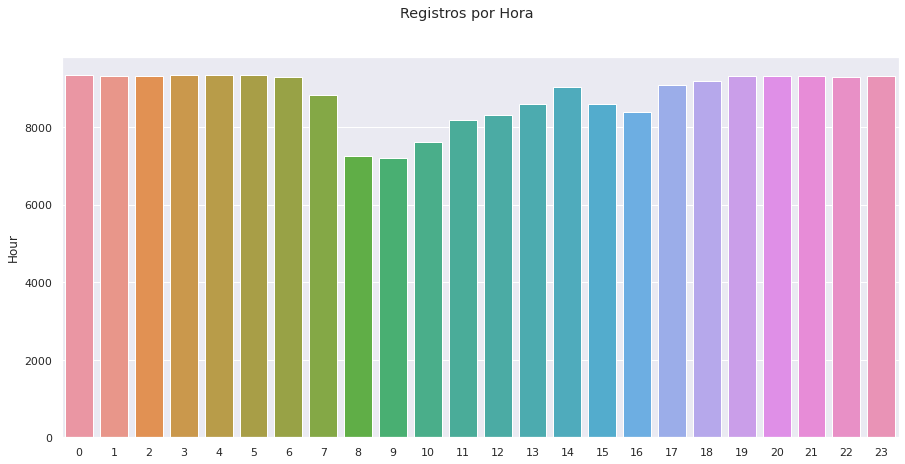

In [ ]:
fig = plt.figure(figsize=(15,7)).suptitle("Registros por Hora")
seaborn.barplot( x=hour_counts.index, y=hour_counts)

Observamos que a las 8 de la manana se podruce un signaficativo descenso registros. 
Otro dato relevante es que durante la noche desde 21 a 23 se generan más registros que de 0 a 7. Hasta este momento no podemos determionar el motivo de este decenso.

**Cómo afecta a nuestro dataset la basa de registros en horarios críticos como son las 8 , 11, 12 y 16 en los que la planta se ecnuentra en plena producción?** 

# Análisis por puntos de Factor de Potencia Total

La medición del consumo de energía eléctrica implica la medición de las potencias activa 
(kW), la potencia reactiva (kVAr) y la suma vectorial de estas dos denominada potencia 
aparente (kVA). La potencia Activa es la que se convierte en trabajo útil mientras que la 
potencia reactiva es la que se requiere para el funcionamiento de ciertos artefactos como 
motores, bobinas, etc.

La potencia reactiva implica un costo para las empresas distribuidoras, transportadoras de 
energía eléctrica por lo que estas penalizan su uso por sobre un factor adimensional denominado Cosφ. 
Debido a que los diferentes artefactos presentes en una instalación industrial necesitan la potencia reactiva para su funcionamiento, es necesario instalar bancos de capacitores (automáticos o manuales) que compensen el cosφ para mantenerlo dentro de los limites establecidos por la distribuidora electrica.  

En Córdoba EPEC realiza mediciones de la Energia suministrada y penaliza a los consumidores industriales con Cosφ menos a 0.95. Por este motivo el analisis de estos puntos cobra signitficattiva importancia. 

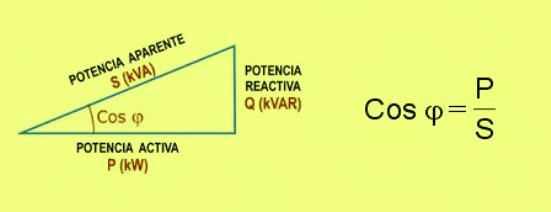

La formulación para las potencias es la siguiente:

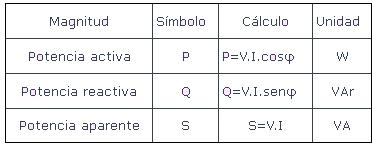

Text(0.5, 0.98, 'Potencia Activa Total')

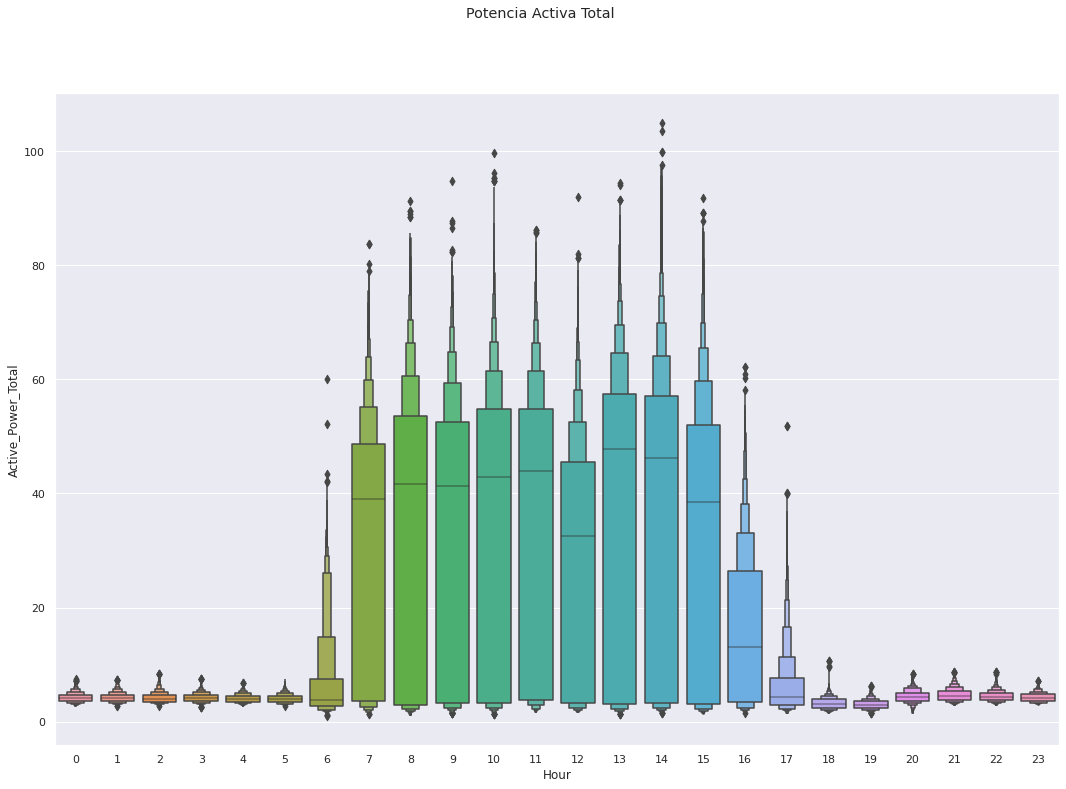

In [ ]:
fig = plt.figure(figsize=(18, 12))
seaborn.boxenplot(data = df_1, x = 'Hour', y = 'Active_Power_Total')
fig.suptitle('Potencia Activa Total')

In [ ]:
df_1['Power_Factor_Total'].max(), df_1['Power_Factor_Total'].min()

(1.01, 0.35)

Text(0.5, 0.98, 'Factor de Potencia Total - CosΦ')

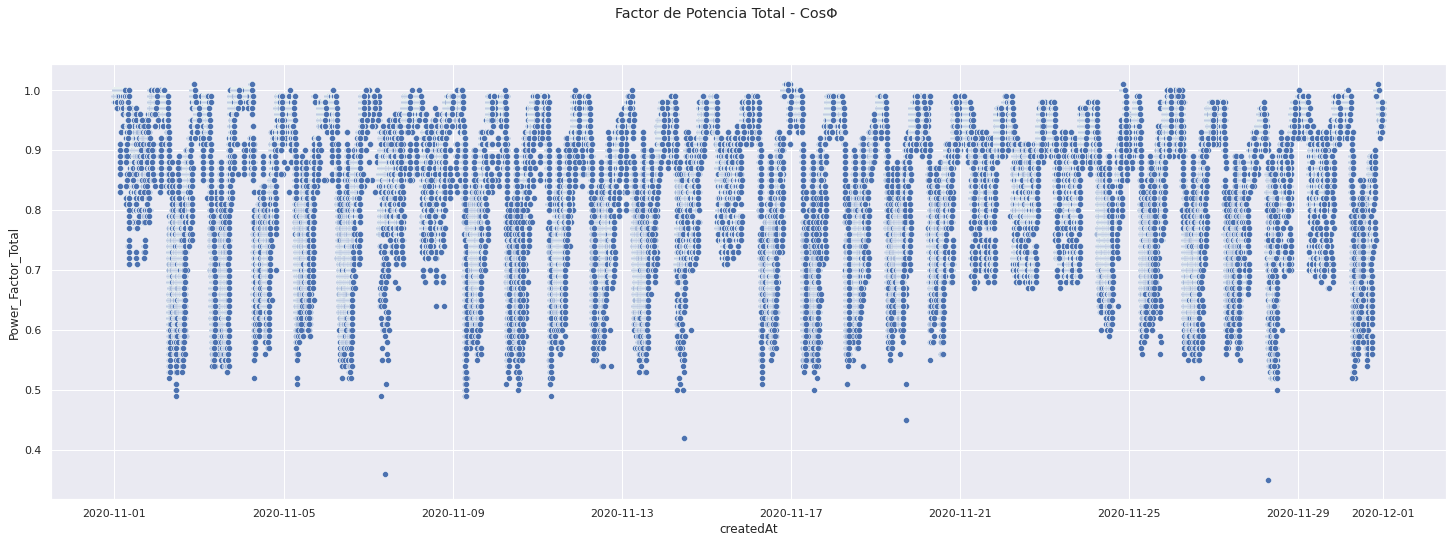

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.scatterplot(data=df_1, y='Power_Factor_Total', x=df_1.index)
fig.suptitle('Factor de Potencia Total - CosΦ')

Desfazando potenciia para comparacion entre semanas

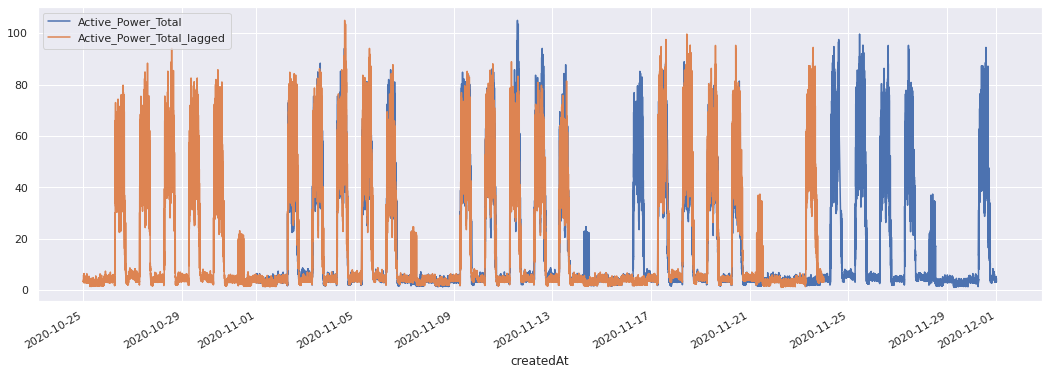

In [ ]:
df_1["Active_Power_Total"].plot(legend=True)
shifted = df_1["Active_Power_Total"].shift(periods=-7, freq="D").plot(legend=True)
shifted.legend(['Active_Power_Total','Active_Power_Total_lagged'])
plt.show()

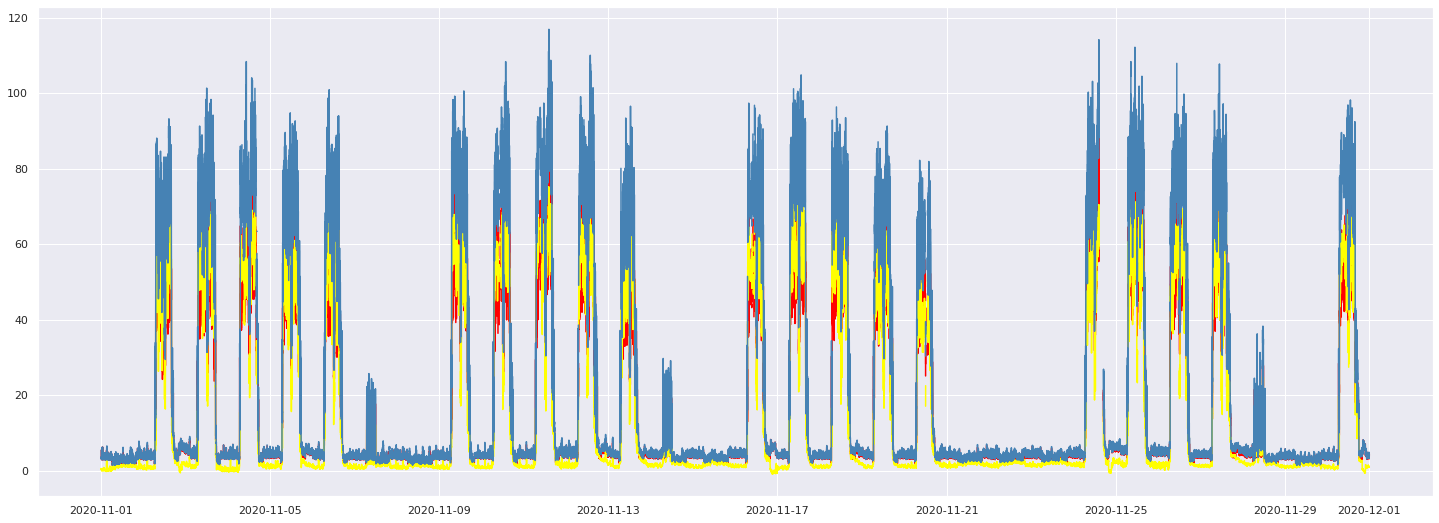

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_1_groupby_minute_mean["Active_Power_Total"], color="red")
ax1.plot( df_1_groupby_minute_mean["Reactive_Power_Total"],  color="yellow")
ax1.plot(df_1_groupby_minute_mean["Apparent_Power_Total"], color="steelblue")
#ax1.plot(df_1_groupby_minute_mean["Power_Factor_Total"], "black")
plt.show()

Este grafico pone en evidencia que los dias sabados hubieron consumos en en fase C, esto se corresponderia con trabajo de proveedores. Ademas evidencia que el dia lunes 23/11 no hubo producción, este dia fue no laborable dado que fue feriado nacional por el Dia de la Soberania Nacional.

Vistazo en detalle a la Columna de Factor de Potencia Total y por Fases

In [ ]:
df_1[['Power_Factor_Total','Power_Factor_A','Power_Factor_B','Power_Factor_C']].describe()

Power_Factor_Total  Power_Factor_A  Power_Factor_B  Power_Factor_C
count       212236.000000   212236.000000   212236.000000   212236.000000
mean             0.853247        0.829017        0.804989        0.907259
std              0.113917        0.100774        0.121508        0.158908
min              0.350000        0.370000        0.320000        0.250000
25%              0.760000        0.750000        0.760000        0.790000
50%              0.880000        0.850000        0.800000        0.970000
75%              0.960000        0.910000        0.820000        1.030000
max              1.010000        0.990000        1.460000        1.600000

Podemos Identificar valores por sobre 1 en la columnas Total - B - C. Debemos definir si estos valores son tratados como Outliers

In [ ]:
"""
df_1.index.name = None
# df_2.index.name = None
merged_df = df_1.merge(df_2.rename(columns={
  'Power_Factor':'Power_Factor_Total',
  #'Voltage': ,
  #'Current' : , 
  'Active_Power': 'Active_Power_Total',
  'Apparent_Power': 'Apparent_Power_Total',
  'Reactive_Power':'Reactive_Power_Total',
  'Power_Factor': 'Power_Factor_Total',
  #'Phase_angle', 'Frequency', 'Fordward_Energy','Reverse_Energy', 'Abs_Energy', 'Ind_Energy','Cap_Energy', 'Abs_Reactive_Energy'
  
  }),how='outer')
merged_df.index = pandas.to_datetime(merged_df['createdAt'],infer_datetime_format=True)
merged_df.head()
"""

"\ndf_1.index.name = None\n# df_2.index.name = None\nmerged_df = df_1.merge(df_2.rename(columns={\n  'Power_Factor':'Power_Factor_Total',\n  #'Voltage': ,\n  #'Current' : , \n  'Active_Power': 'Active_Power_Total',\n  'Apparent_Power': 'Apparent_Power_Total',\n  'Reactive_Power':'Reactive_Power_Total',\n  'Power_Factor': 'Power_Factor_Total',\n  #'Phase_angle', 'Frequency', 'Fordward_Energy','Reverse_Energy', 'Abs_Energy', 'Ind_Energy','Cap_Energy', 'Abs_Reactive_Energy'\n  \n  }),how='outer')\nmerged_df.index = pandas.to_datetime(merged_df['createdAt'],infer_datetime_format=True)\nmerged_df.head()\n"

Para comprender mejor las posibles desviaciones debemos contrastar el factor de potencia de cada fase por separado

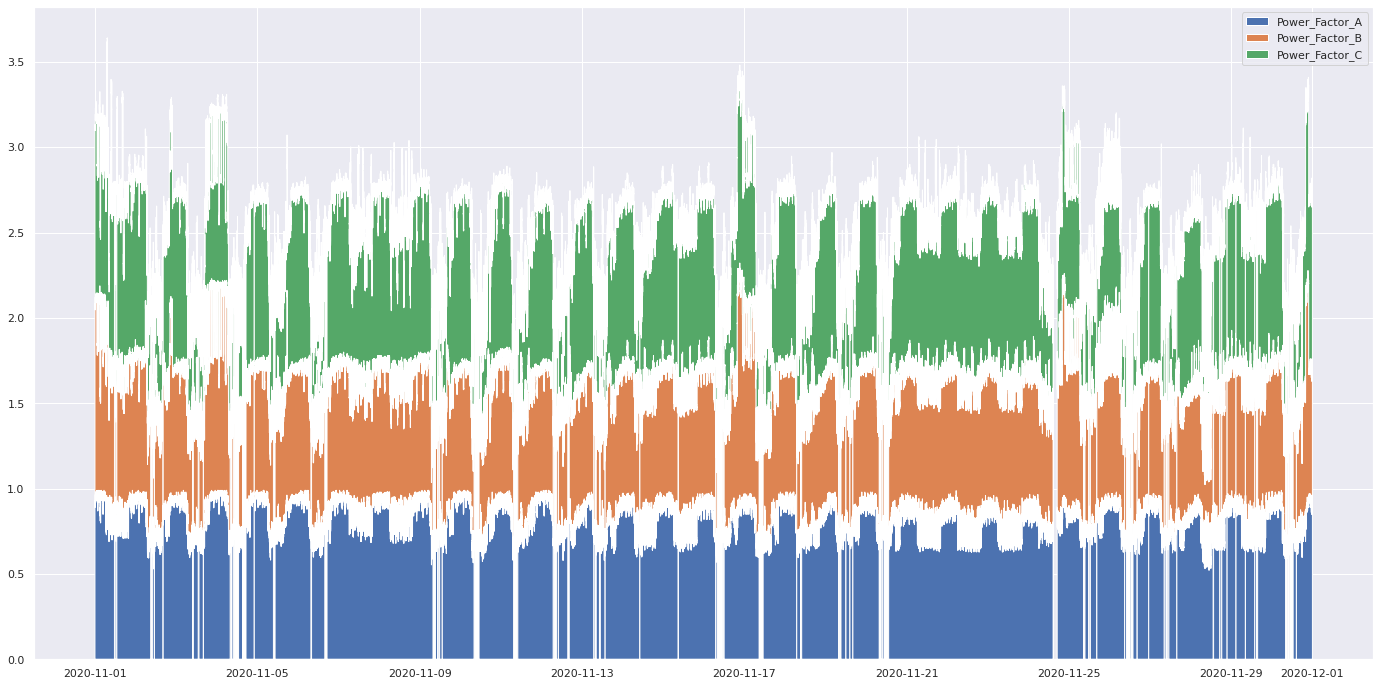

In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
df_2 = pandas.read_csv(file_input)
plt.figure(figsize=(24, 12))
# Create data
#x=range(1,200)
x=df_1_groupby_minute_mean.index
y1=df_1_groupby_minute_mean['Power_Factor_A']
y2=df_1_groupby_minute_mean['Power_Factor_B']
y3=df_1_groupby_minute_mean['Power_Factor_C']
# Basic stacked area chart.
plt.stackplot(x, y1, y2, y3,  labels=['Power_Factor_A','Power_Factor_B','Power_Factor_C'])
plt.legend(loc='upper right')


Del gráfico anterior podemos estimar que los factores de potencia por fase se encuentran desbalanceados, seguramente porque en la instalación existe un banco de capacitores general.
Los picos y valles fuera del horario laboral hacen suponer que poseen cargas inductivas (seguramente luminarias tipo LED) que generan estos cambios bruscos.

También se puede ver que sobre la fase C existe un gran ruido durante el horario de producción, probablemente por gran cantidad de fuentes tipo switching conectadas a esta fase.

# Análisis de Voltaje por Fases

Se graficara el voltaje en el tiempo de las tres fases para conocer como es su comportamiento en el tiempo

Text(0.5, 1.0, 'Voltage_C_N')

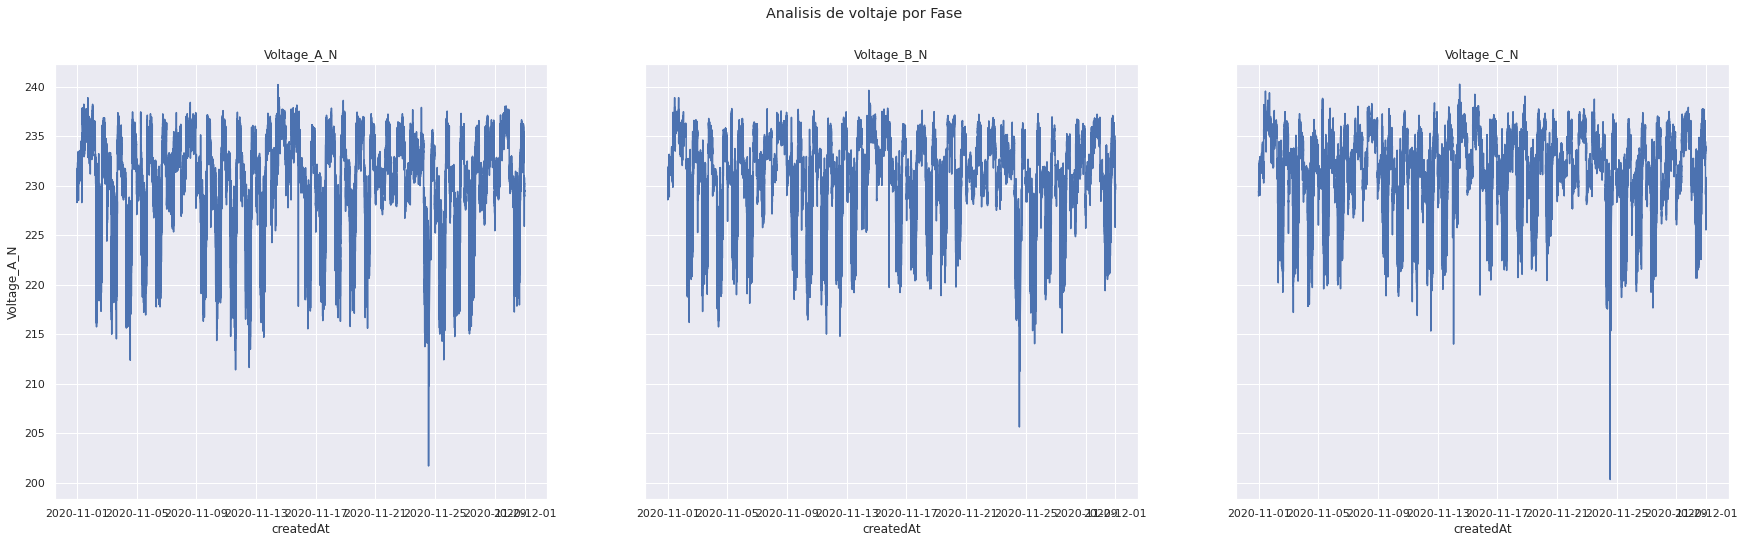

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8), sharey=True)
fig.suptitle('Analisis de voltaje por Fase')

seaborn.lineplot(data=df_1,  ax=axes[0], x=df_1.index, y="Voltage_A_N")
axes[0].set_title('Voltage_A_N')

seaborn.lineplot(data=df_1,  ax=axes[1], x=df_1.index, y="Voltage_B_N")
axes[1].set_title('Voltage_B_N')

seaborn.lineplot(data=df_1,  ax=axes[2], x=df_1.index, y="Voltage_C_N")
axes[2].set_title('Voltage_C_N')


Se puede ver de esto que el voltaje no presenta una gran variabilidad y se puede considerar que se mantiene constante en el tiempo, por tanto la potencia y el factor dependencia seran dependientes de la variación de la corriente

# Análisis de Corriente por Fases

De manera de comenzar a determinar las posibles causas de los problemas del factor de Potencia, debemos realizar un analisis de los consumos por fases que nos permitan entender posibles desviaciones que esten afectando al cos phi general.

Basándonos en conceptos básicos de electricidad analizaremos las curvas de corrientes ya que son las que tienen mayor variabilidad. Por ahora podemos estimar el Voltaje constante aunque sabemos que no lo es 100%.

Text(0.5, 1.0, 'Current_C')

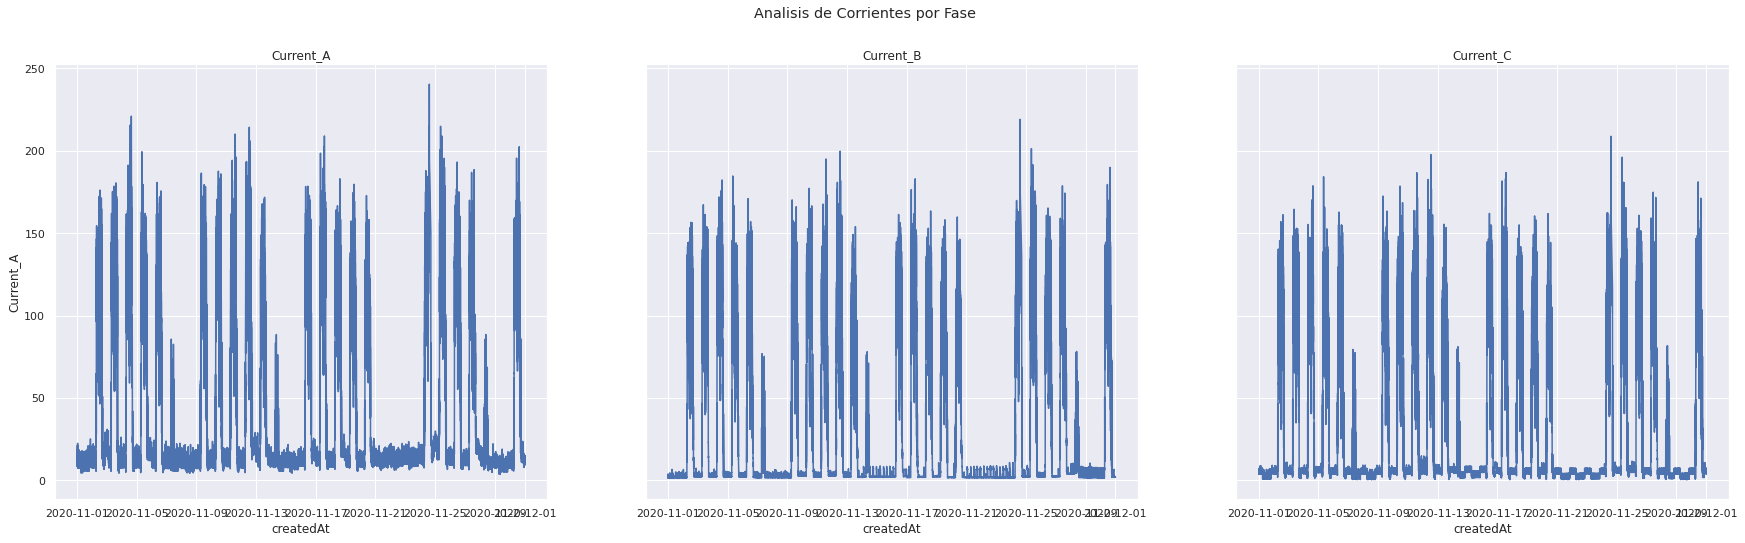

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8), sharey=True)
fig.suptitle('Analisis de Corrientes por Fase')

seaborn.lineplot(data=df_1,  ax=axes[0], x=df_1.index, y="Current_A")
axes[0].set_title('Current_A')

seaborn.lineplot(data=df_1,  ax=axes[1], x=df_1.index, y="Current_B")
axes[1].set_title('Current_B')

seaborn.lineplot(data=df_1,  ax=axes[2], x=df_1.index, y="Current_C")
axes[2].set_title('Current_C')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 200.0, 0.0, 0.15851646969190614)

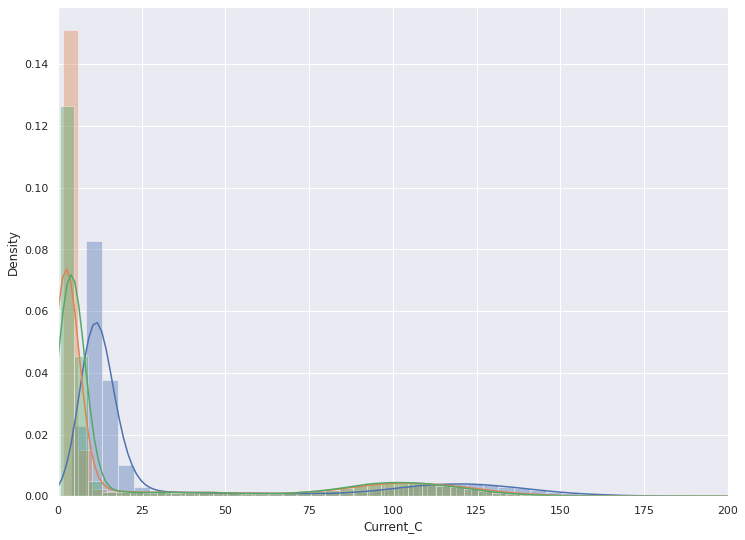

In [ ]:
f,ax=plt.subplots(figsize=(12, 9))
seaborn.distplot(df_1['Current_A']).axis(xmin=0,xmax=200)
seaborn.distplot(df_1['Current_B']).axis(xmin=0,xmax=200)
seaborn.distplot(df_1['Current_C']).axis(xmin=0,xmax=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Current_C')

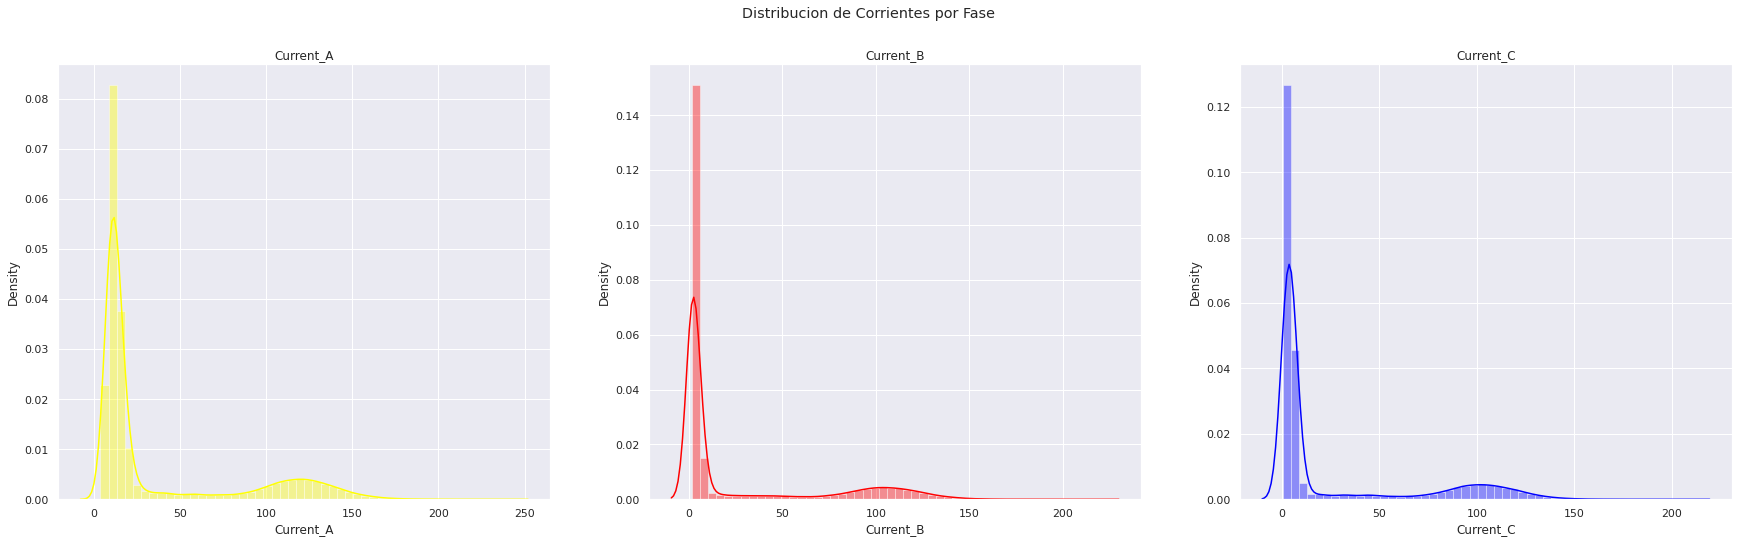

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8))
fig.suptitle('Distribucion de Corrientes por Fase')

seaborn.distplot(df_1['Current_A'],ax=axes[0], color='yellow')
axes[0].set_title('Current_A')

seaborn.distplot(df_1['Current_B'],ax=axes[1],color='red')
axes[1].set_title('Current_B')

seaborn.distplot(df_1['Current_C'],ax=axes[2], color='blue')
axes[2].set_title('Current_C')

In [ ]:
df_1_currents_max = df_1_groupby_minute_max[['Current_A', 'Current_B', 'Current_C', 'Current_N']]
df_1_currents_max.head()

Current_A  Current_B  Current_C  Current_N
createdAt                                                            
2020-11-01 00:00:00+00:00      12.83       1.57       4.25       9.17
2020-11-01 00:01:00+00:00      10.35       1.57       4.25       6.75
2020-11-01 00:02:00+00:00      14.62       3.74       5.91       8.12
2020-11-01 00:03:00+00:00      10.34       1.60       4.25       6.75
2020-11-01 00:04:00+00:00       8.85       1.61       4.25       5.43

In [ ]:
work_shift_filter = df_1_currents_max.loc[(df_1_currents_max.index.hour > 6)
                                                         & (df_1_currents_max.index.hour < 18)]
work_shift_filter

Current_A  Current_B  Current_C  Current_N
createdAt                                                            
2020-11-01 07:00:00+00:00       9.36       1.97       0.95       8.45
2020-11-01 07:01:00+00:00       9.34       1.96       0.95       8.44
2020-11-01 07:02:00+00:00       9.39       1.96       0.95       8.47
2020-11-01 07:03:00+00:00       7.13       1.61       0.95       7.10
2020-11-01 07:04:00+00:00       7.13       1.61       0.96       7.09
...                              ...        ...        ...        ...
2020-11-30 17:55:00+00:00      32.34      19.60      18.91      14.37
2020-11-30 17:56:00+00:00      32.30      19.59      18.69      14.81
2020-11-30 17:57:00+00:00      42.67      31.36      30.09      14.80
2020-11-30 17:58:00+00:00      42.67      31.36      30.09      13.41
2020-11-30 17:59:00+00:00      31.28      19.81      17.83      13.75

[19800 rows x 4 columns]

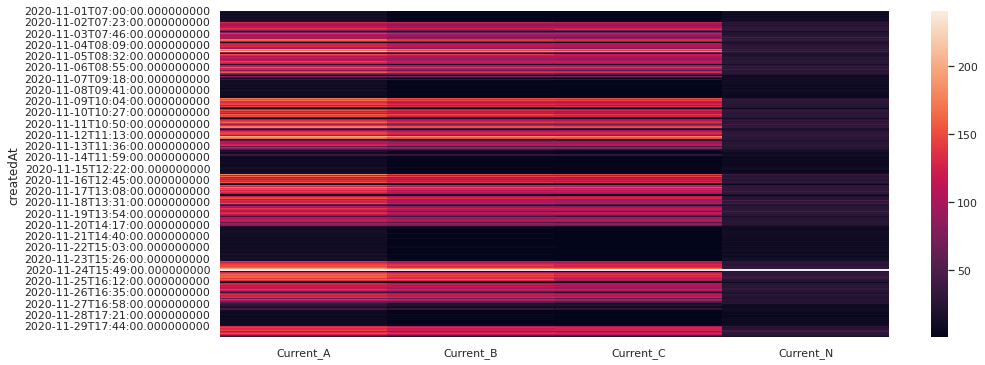

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = seaborn.heatmap(work_shift_filter)

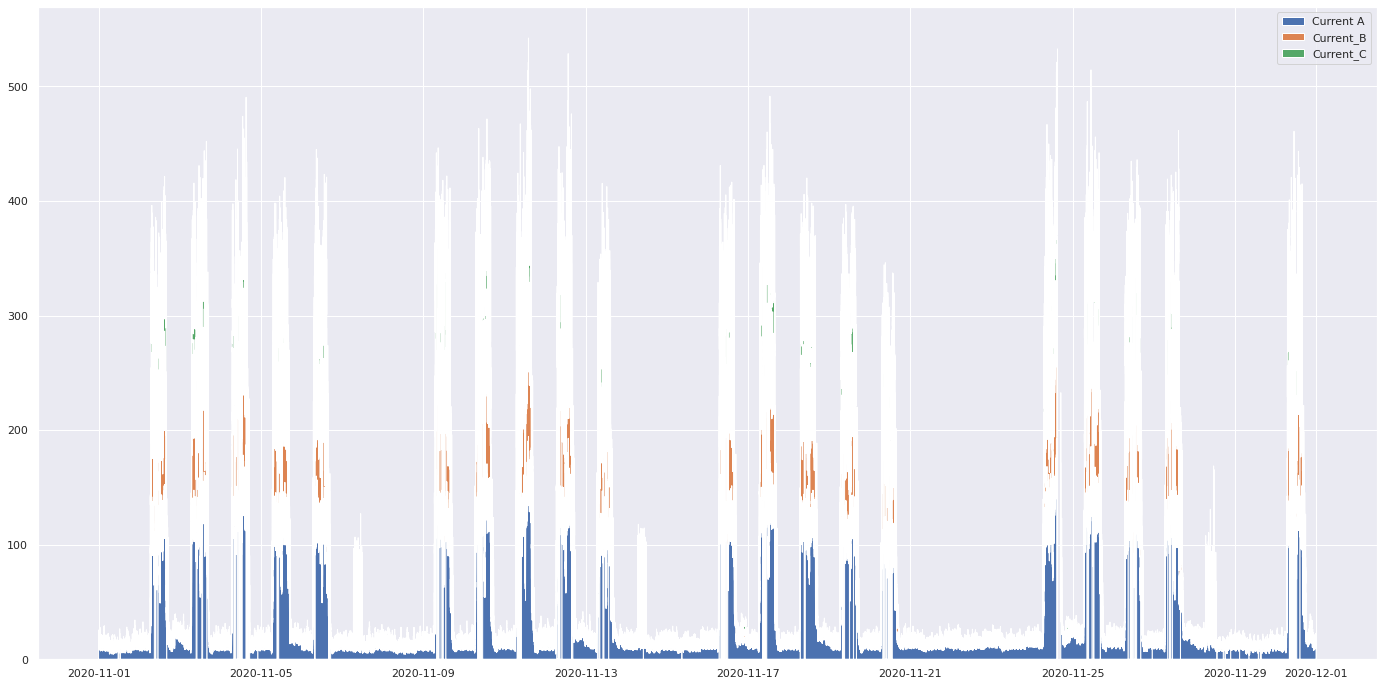

In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
#df_2 = pandas.read_csv(url1)
plt.figure(figsize=(24, 12))
# Create data
#x=range(1,200)
x=df_1_groupby_minute_mean.index
y1=df_1_groupby_minute_mean['Current_A']
y2=df_1_groupby_minute_mean['Current_B']
y3=df_1_groupby_minute_mean['Current_C']

# Basic stacked area chart.
plt.stackplot(x, y1, y2, y3,  labels=['Current A','Current_B','Current_C'])
plt.legend(loc='upper right')


En el grafico anterior podemos ver que en los horarios de menor consumo la mayor corriente es la corriente A, por lo que se podria inferir que el sistema luminico de la empresa se alimenta con esta fase

# Análisis de consumo de Energia

La energia consumida es otra de las variables a tener en cuenta en la tarifa electrica. Se debe tener en cuenta los maximos consumidos mensualmente para definir valor contratado

In [ ]:
relevant_cols = ['Active_Energy_Delivered','Active_Energy_Received',  'Reactive_Energy_Delivered','Reactive_Energy_Received', 'Apparent_Energy_Delivered','Apparent_Energy_Received']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
df_3 = df_1[relevant_cols]

<Figure size 1728x864 with 0 Axes>

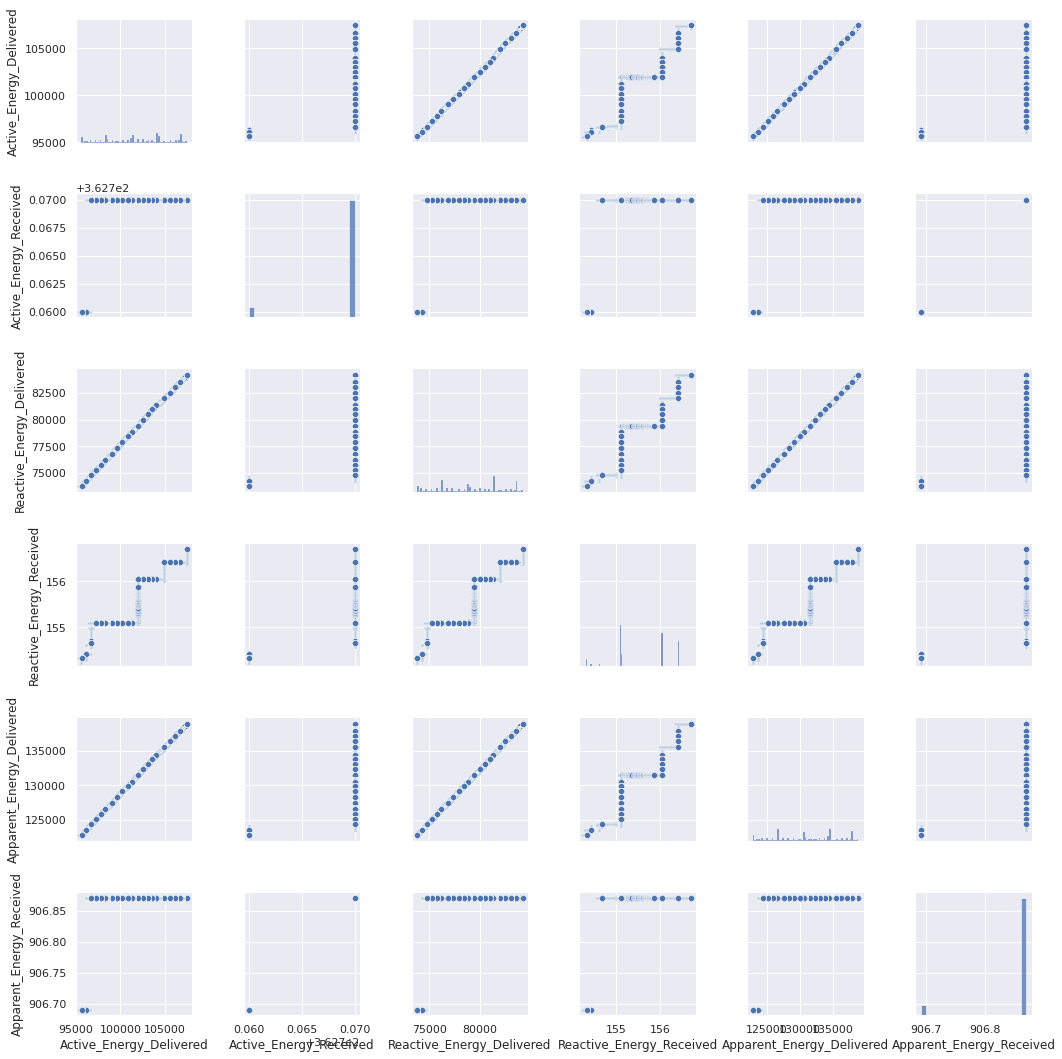

In [ ]:
plt.figure(figsize=(24, 12))
seaborn.pairplot(data= df_3)

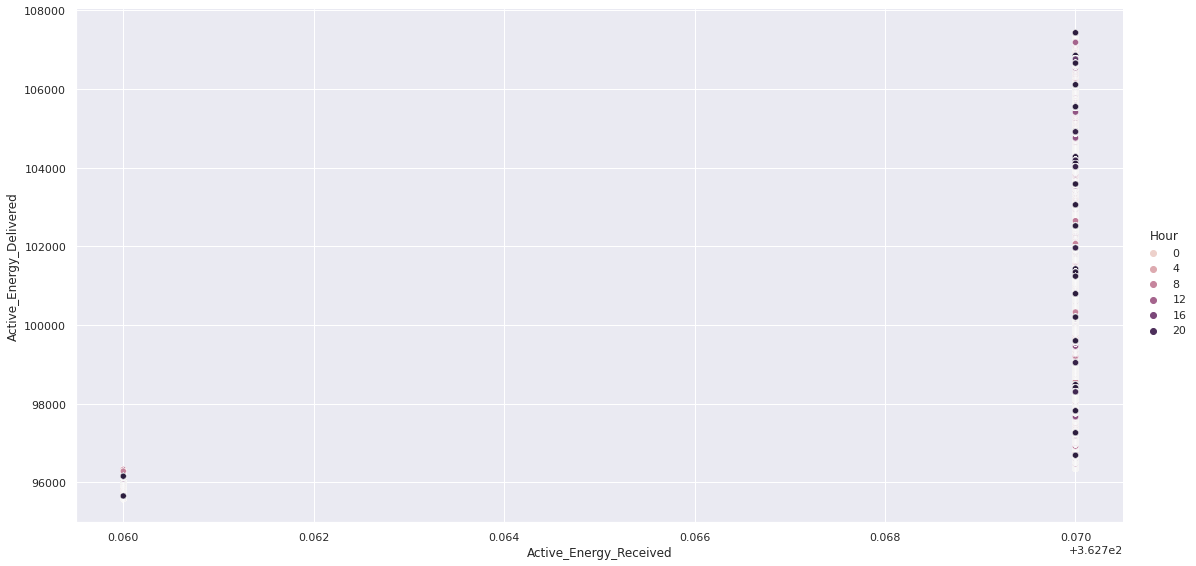

In [ ]:
seaborn.pairplot(data=df_1, y_vars=['Active_Energy_Delivered'],
                 x_vars=['Active_Energy_Received'],hue='Hour',
                 aspect=2, height=8)

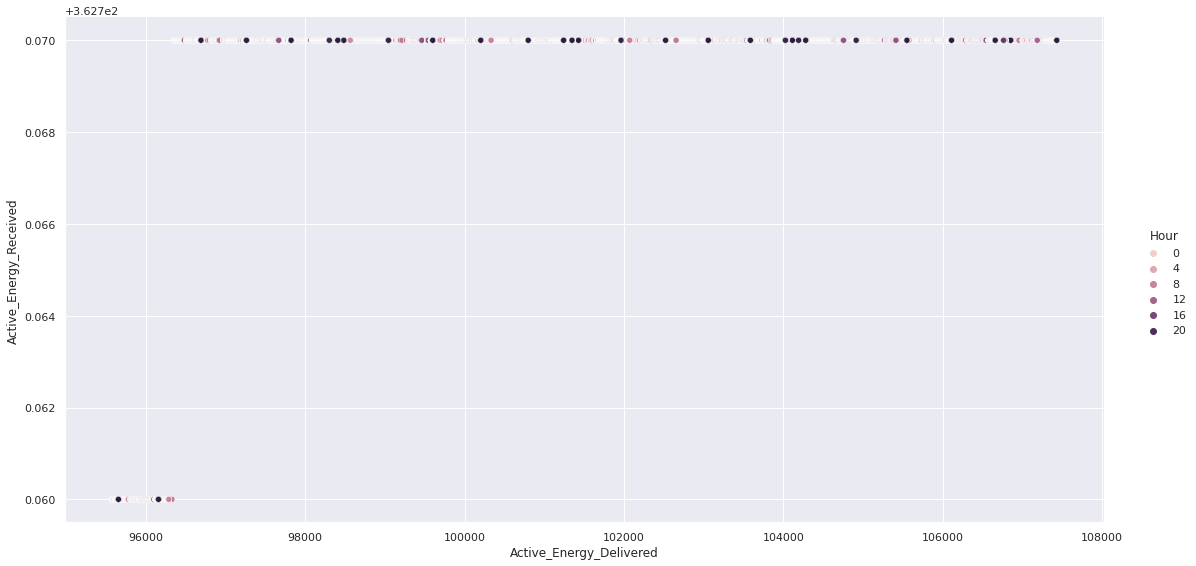

In [ ]:
seaborn.pairplot(data=df_1, y_vars=['Active_Energy_Received'],
                 x_vars=['Active_Energy_Delivered'],hue='Hour',
                 aspect=2, height=8)

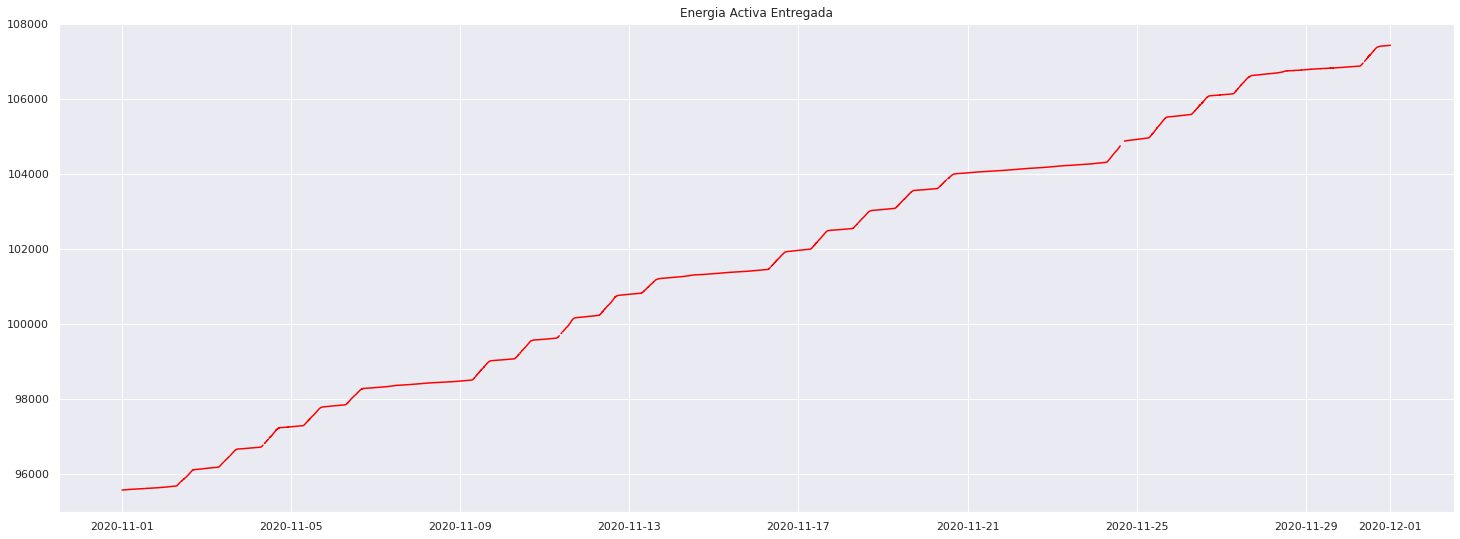

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_1_groupby_minute_mean["Active_Energy_Delivered"], color="red")
#ax1.plot( df_1_groupby_minute_mean["Active_Energy_Received"],  color="red")
ax1.set(title='Energia Activa Entregada')
#ax1.plot(df_industrial_groupby_minute_mean["Apparent_Energy_Total"], color="steelblue")
#ax1.plot(df_industrial_groupby_minute_mean["Reactive_Power_Total"], "black")
plt.show()

De los graficos anteriores podemos inferir que mientras que la energia recibida se mantiene constante en el tiempo, la energia entregada aumenta con el tiempo y es la que denotara el consumo

# Análisis de la Temperatura

Si bien la tempreratura esta medida dentro del dispositivo, podemos estimar la temperatura del ambiente en base a esta columna, como para estimar cargas puntuales durante de la epoca de verano debido a la utilización de aires acondicinados. 
Un dato importante a relevar es el tipo de calefacción durante la temporatada invernal. Si los mismos equipos de Aire Acondicionado son Frio/Calor, podemos pensar a estas cargas como estivales y constantes durante invierno y verano. Si son solo para tratamiento de aire en verano, deberemos considerarlos como casos especiales y tratar de determinar su consumo particular a fines de evitar que impacten en el análisis de cargas de los equipos de producción. 
Un rápido análisis de los gráficos de los cargas por fase, hace estimar que estas cargas se encuentran sobre la fase A.

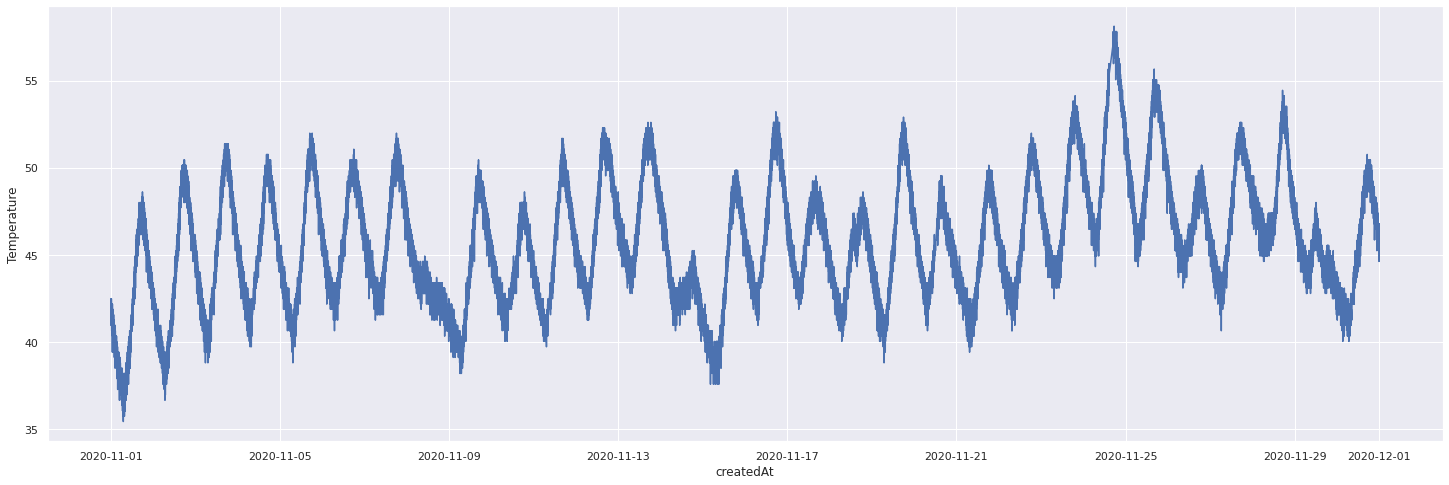

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.lineplot(data=df_1, x=df_1.index, y="Temperature")

Buscamos relacionar la Potencia Activa con la Temperatura para tratar de determinar consumos particulares según los picos de temperatura

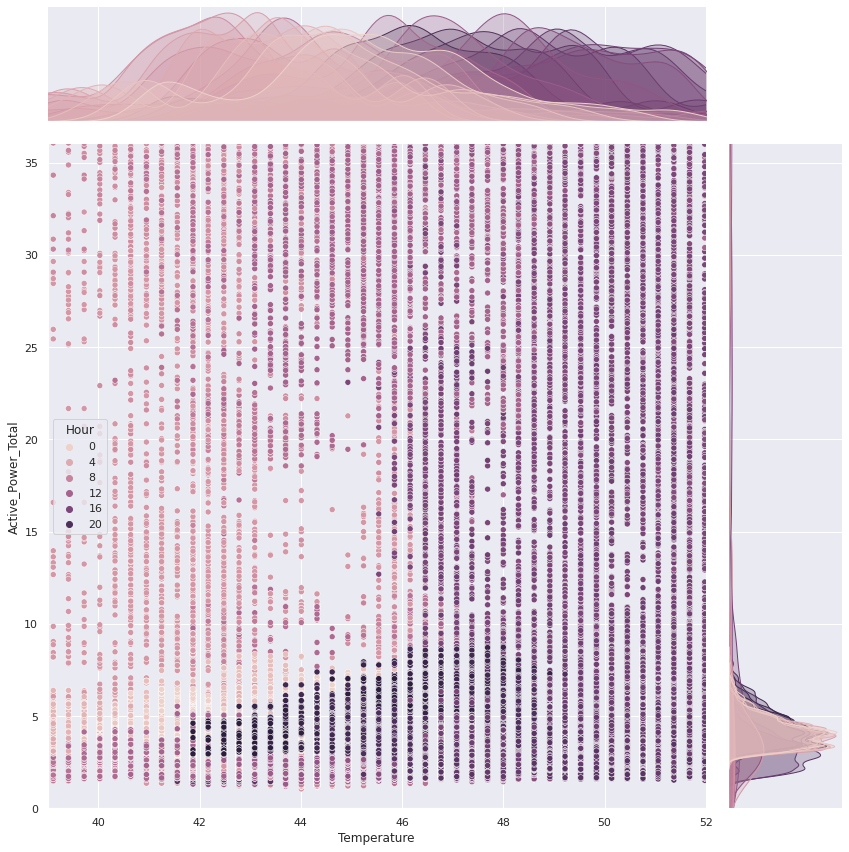

In [ ]:
plot = seaborn.jointplot(data = df_1 , x = 'Temperature', y = 'Active_Power_Total', hue='Hour', height=12)
plot.ax_marg_x.set_xlim(39, 52)
plot.ax_marg_y.set_ylim(0, 36)
plt.show()

A continuacion las temperaturas para cada una de las corrientes para observar si se tiene el mismo comportamiento

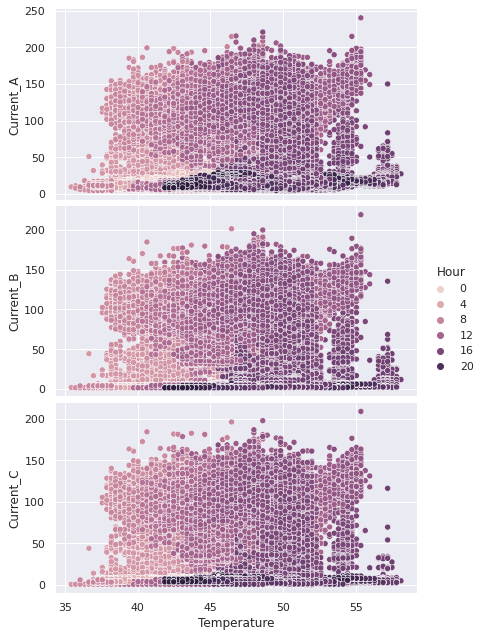

In [ ]:
seaborn.pairplot(data=df_1, y_vars=['Current_A',"Current_B","Current_C"],
                 x_vars=['Temperature'],hue='Hour',
                 aspect=2, height=3)




#Matriz de correlación




In [ ]:
cormat = df_2.corr()
cormat

Active_Energy_Delivered  Active_Energy_LastDay  \
Active_Energy_Delivered                 1.000000              -0.031636   
Active_Energy_LastDay                  -0.031636               1.000000   
Active_Energy_Received                  0.497988               0.038855   
Active_Energy_del_m_rec                 1.000000              -0.031636   
Active_Energy_del_p_rec                 1.000000              -0.031636   
...                                          ...                    ...   
Voltage_UNB_L_N_Worst                        NaN                    NaN   
rsrv1                                        NaN                    NaN   
rsrv2                                        NaN                    NaN   
rsrv3                                        NaN                    NaN   
rsrv4                                        NaN                    NaN   

                         Active_Energy_Received  Active_Energy_del_m_rec  \
Active_Energy_Delivered                0.497988                 1.000000   
Active_Energy_LastDay                  0.038855                -0.031636   
Active_Energy_Received                 1.000000                 0.497987   
Active_Energy_del_m_rec                0.497987                 1.000000   
Active_Energy_del_p_rec                0.497989                 1.000000   
...                                         ...                      ...   
Voltage_UNB_L_N_Worst                       NaN                      NaN   
rsrv1                                       NaN                      NaN   
rsrv2                                       NaN                      NaN   
rsrv3                                       NaN                      NaN   
rsrv4                                       NaN                      NaN   

                         Active_Energy_del_p_rec  Active_Power_A  \
Active_Energy_Delivered                 1.000000       -0.035844   
Active_Energy_LastDay                  -0.031636        0.955553   
Active_Energy_Received                  0.497989        0.033268   
Active_Energy_del_m_rec                 1.000000       -0.035844   
Active_Energy_del_p_rec                 1.000000       -0.035844   
...                                          ...             ...   
Voltage_UNB_L_N_Worst                        NaN             NaN   
rsrv1                                        NaN             NaN   
rsrv2                                        NaN             NaN   
rsrv3                                        NaN             NaN   
rsrv4                                        NaN             NaN   

                         Active_Power_B  Active_Power_C  Active_Power_Total  \
Active_Energy_Delivered       -0.022322       -0.041383           -0.033109   
Active_Energy_LastDay          0.957685        0.945758            0.956104   
Active_Energy_Received         0.038184        0.034476            0.035396   
Active_Energy_del_m_rec       -0.022322       -0.041384           -0.033109   
Active_Energy_del_p_rec       -0.022322       -0.041383           -0.033109   
...                                 ...             ...                 ...   
Voltage_UNB_L_N_Worst               NaN             NaN                 NaN   
rsrv1                               NaN             NaN                 NaN   
rsrv2                               NaN             NaN                 NaN   
rsrv3                               NaN             NaN                 NaN   
rsrv4                               NaN             NaN                 NaN   

                         Apparent_Energy_Delivered  Apparent_Energy_Received  \
Active_Energy_Delivered                   0.999976                  0.497988   
Active_Energy_LastDay                    -0.031033                  0.038855   
Active_Energy_Received                    0.500104                  1.000000   
Active_Energy_del_m_rec                   0.999976                  0.497987   
Active_Energy_del_p_rec                   0.9

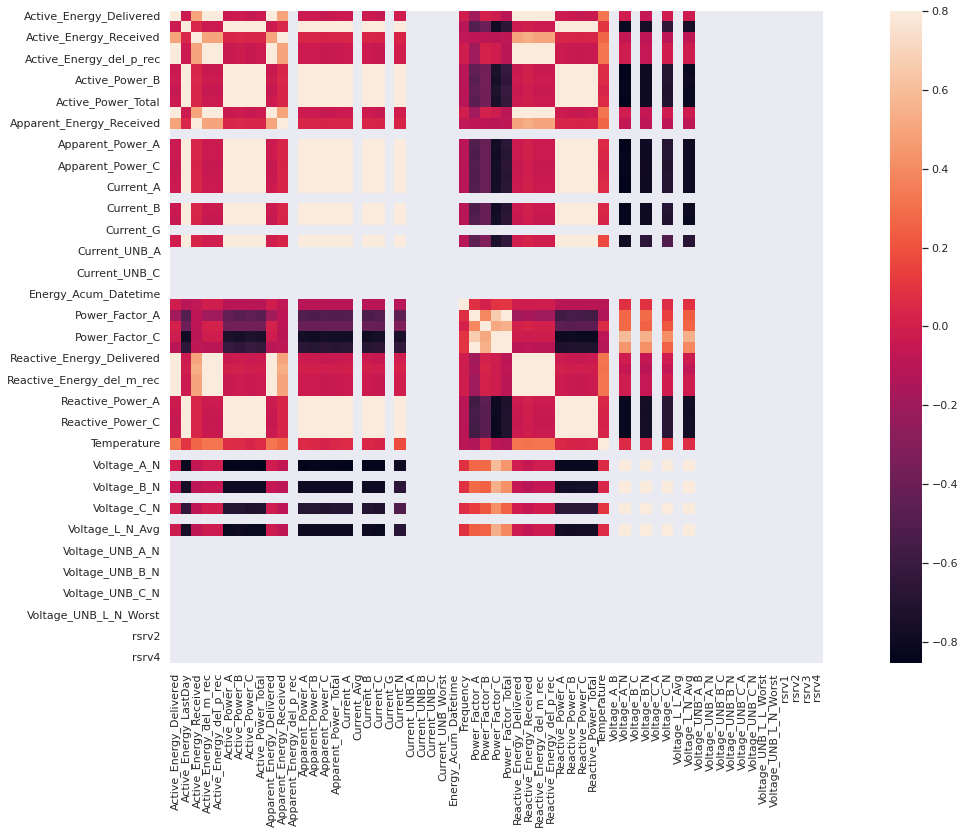

In [ ]:
plt.figure(figsize=(24, 12))
seaborn.heatmap(cormat, vmax=0.8, square=True)

# Análisis de la Temperatura Ambiente

Para el analisiis de la temperatura ambiente  y su respectiva incidencia en el consumo se utilizara un dataframe extraido del Servicio Metereologico Nacional.
Dicho dataframe cuenta con la temperatura por hora de varios puntos de la republica Argentina.
Se realizara un union de dataframes y se visualizaran resultados.

###Ingesta de Dataframes

In [ ]:
file_input = "file20201101_mes.csv"
df_1 = pandas.read_csv(file_input)

In [ ]:
df_temps = pandas.read_csv("temperatures_smn.txt", header="infer",encoding='cp1252', on_bad_lines="skip", sep="  ",)
df_temps

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


FECHA  HORA  TEMP    HUM           PNM    DD    FF  \
0         [HOA]  [ºC]   [%]  [hPa]  [gr] [km/hr]  None  None   
1      01112020     0  17.1     76        1024.8    70    15   
2      01112020     1  16.3     71        1024.3   110    17   
3      01112020     2  16.1     64        1023.9   110    11   
4      01112020     3  16.2     75        1024.1    70     9   
...         ...   ...   ...    ...           ...   ...   ...   
61098  30112020    19  26.1     44        1012.0    50    37   
61099  30112020    20  24.8     38        1012.0    50    30   
61100  30112020    21  22.8     40        1012.6    50    19   
61101  30112020    22  21.1     46        1013.1    50    30   
61102  30112020    23  20.0     42        1013.1    50    30   

                    NOMBRE  
0                     None  
1          AEROPARQUE AERO  
2          AEROPARQUE AERO  
3          AEROPARQUE AERO  
4          AEROPARQUE AERO  
...                    ...  
61098  VILLA REYNOLDS AERO  
61099  VILLA REYNOLDS AERO  
61100  VILLA REYNOLDS AERO  
61101  VILLA REYNOLDS AERO  
61102  VILLA REYNOLDS AERO  

[61103 rows x 8 columns]

In [ ]:
df_temps['DATETIME'] = df_temps['FECHA'] + '-' + df_temps['HORA']
df_temps

FECHA  HORA  TEMP    HUM           PNM    DD    FF  \
0         [HOA]  [ºC]   [%]  [hPa]  [gr] [km/hr]  None  None   
1      01112020     0  17.1     76        1024.8    70    15   
2      01112020     1  16.3     71        1024.3   110    17   
3      01112020     2  16.1     64        1023.9   110    11   
4      01112020     3  16.2     75        1024.1    70     9   
...         ...   ...   ...    ...           ...   ...   ...   
61098  30112020    19  26.1     44        1012.0    50    37   
61099  30112020    20  24.8     38        1012.0    50    30   
61100  30112020    21  22.8     40        1012.6    50    19   
61101  30112020    22  21.1     46        1013.1    50    30   
61102  30112020    23  20.0     42        1013.1    50    30   

                    NOMBRE     DATETIME  
0                     None   [HOA]-[ºC]  
1          AEROPARQUE AERO   01112020-0  
2          AEROPARQUE AERO   01112020-1  
3          AEROPARQUE AERO   01112020-2  
4          AEROPARQUE AERO   01112020-3  
...                    ...          ...  
61098  VILLA REYNOLDS AERO  30112020-19  
61099  VILLA REYNOLDS AERO  30112020-20  
61100  VILLA REYNOLDS AERO  30112020-21  
61101  VILLA REYNOLDS AERO  30112020-22  
61102  VILLA REYNOLDS AERO  30112020-23  

[61103 rows x 9 columns]

In [ ]:
#import re
#regex_r = r"(\d+)\s+(\d+)\s+(\d+.\d)\s+(\d+)\s+(\d+.\d)\s+(\d+)\s+(\d+)\s+([a-zA-Z\s]+)"
#lista = [re.findall(regex_r,line) for line in open('temperatures_smn.txt', encoding="cp1252" )]

In [ ]:
df_temps.index = pandas.to_datetime(
    df_temps['DATETIME'],
    errors="coerce",
    format='%d%m%Y-%H')

In [ ]:
df_temps

FECHA  HORA  TEMP    HUM           PNM    DD    FF  \
DATETIME                                                                     
NaT                     [HOA]  [ºC]   [%]  [hPa]  [gr] [km/hr]  None  None   
2020-11-01 00:00:00  01112020     0  17.1     76        1024.8    70    15   
2020-11-01 01:00:00  01112020     1  16.3     71        1024.3   110    17   
2020-11-01 02:00:00  01112020     2  16.1     64        1023.9   110    11   
2020-11-01 03:00:00  01112020     3  16.2     75        1024.1    70     9   
...                       ...   ...   ...    ...           ...   ...   ...   
2020-11-30 19:00:00  30112020    19  26.1     44        1012.0    50    37   
2020-11-30 20:00:00  30112020    20  24.8     38        1012.0    50    30   
2020-11-30 21:00:00  30112020    21  22.8     40        1012.6    50    19   
2020-11-30 22:00:00  30112020    22  21.1     46        1013.1    50    30   
2020-11-30 23:00:00  30112020    23  20.0     42        1013.1    50    30   

                                  NOMBRE     DATETIME  
DATETIME                                               
NaT                                 None   [HOA]-[ºC]  
2020-11-01 00:00:00      AEROPARQUE AERO   01112020-0  
2020-11-01 01:00:00      AEROPARQUE AERO   01112020-1  
2020-11-01 02:00:00      AEROPARQUE AERO   01112020-2  
2020-11-01 03:00:00      AEROPARQUE AERO   01112020-3  
...                                  ...          ...  
2020-11-30 19:00:00  VILLA REYNOLDS AERO  30112020-19  
2020-11-30 20:00:00  VILLA REYNOLDS AERO  30112020-20  
2020-11-30 21:00:00  VILLA REYNOLDS AERO  30112020-21  
2020-11-30 22:00:00  VILLA REYNOLDS AERO  30112020-22  
2020-11-30 23:00:00  VILLA REYNOLDS AERO  30112020-23  

[61103 rows x 9 columns]

In [ ]:
df_temps['NOMBRE'].unique()

array([None, 'AEROPARQUE AERO', 'AZUL AERO', 'BAHIA BLANCA AERO',
       'BARILOCHE AERO', 'BASE BELGRANO II', 'BASE CARLINI (EX JUBANY)',
       'BASE ESPERANZA', 'BASE MARAMBIO', 'BASE ORCADAS',
       'BASE SAN MARTIN', 'BERNARDO DE IRIGOYEN AERO', 'BOLIVAR AERO',
       'BUENOS AIRES OBSERVATORIO', 'CAMPO DE MAYO AERO',
       'CATAMARCA AERO', 'CERES AERO', 'CHAMICAL AERO', 'CHAPELCO AERO',
       'CHEPES', 'CHILECITO AERO', 'CIPOLLETTI',
       'COMODORO RIVADAVIA AERO', 'CONCORDIA AERO', 'CORDOBA AERO',
       'CORDOBA OBSERVATORIO', 'CORONEL PRINGLES AERO',
       'CORONEL SUAREZ AERO', 'CORRIENTES AERO', 'DOLORES AERO',
       'EL BOLSON AERO', 'EL CALAFATE AERO', 'EL PALOMAR AERO',
       'EL TREBOL', 'ESCUELA DE AVIACION MILITA', 'ESQUEL AERO',
       'EZEIZA AERO', 'FORMOSA AERO', 'GENERAL PICO AERO',
       'GOBERNADOR GREGORES AERO', 'GUALEGUAYCHU AERO', 'IGUAZU AERO',
       'JUJUY AERO', 'JUJUY U N', 'JUNIN AERO', 'LA PLATA AERO',
       'LA QUIACA OBSERVATORIO', 'LA RI

Se visualiza que para la ciudad de Córdoba se tienen tres puntos de recoleccion de datos:


*   Observatorio Córdoba
*   Aeropuerto Córdoba
*   Escuela de Aviaciión Militar





In [ ]:
df_cordoba_observatorio = df_temps[df_temps['NOMBRE'] == 'CORDOBA OBSERVATORIO']
df_cordoba_aero = df_temps[df_temps['NOMBRE'] == 'CORDOBA AERO']
df_cordoba_fuerza_aerea = df_temps[df_temps['NOMBRE'] == 'ESCUELA DE AVIACION MILITA']

Para la union de dataframes se utilizara las tomas realizadas en el Observatorio Córdoba

In [ ]:
df_cordoba_observatorio['TEMP'].min(), df_cordoba_observatorio['TEMP'].max()

('11.7', '38.2')

Preparación del dataframe de consumo de energia

In [ ]:
df_1.index = pandas.to_datetime(
    df_1['createdAt'],
    errors="coerce",
    format='%Y%m%d %H:%M:%S.%f',
    ).dt.tz_convert(None)
    #2020-11-30 23:59:12.616

In [ ]:
df_1

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                                 
2020-11-30 00:00:12.342                106852.29                   3.81   
2020-11-30 00:00:22.759                106852.29                   3.81   
2020-11-30 00:00:39.117                106852.29                   3.81   
2020-11-30 00:00:48.160                106852.32                   3.81   
2020-11-30 00:00:58.693                106852.33                   3.81   
...                                          ...                    ...   
2020-11-01 23:58:06.425                 95656.45                   3.77   
2020-11-01 23:58:18.775                 95656.45                   3.77   
2020-11-01 23:58:29.311                 95656.47                   3.77   
2020-11-01 23:59:02.412                 95656.49                   3.77   
2020-11-01 23:59:35.683                 95656.52                   3.77   

                         Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                                  
2020-11-30 00:00:12.342                  362.77                106489.52   
2020-11-30 00:00:22.759                  362.77                106489.52   
2020-11-30 00:00:39.117                  362.77                106489.52   
2020-11-30 00:00:48.160                  362.77                106489.55   
2020-11-30 00:00:58.693                  362.77                106489.55   
...                                         ...                      ...   
2020-11-01 23:58:06.425                  362.76                 95293.70   
2020-11-01 23:58:18.775                  362.76                 95293.70   
2020-11-01 23:58:29.311                  362.76                 95293.71   
2020-11-01 23:59:02.412                  362.76                 95293.73   
2020-11-01 23:59:35.683                  362.76                 95293.77   

                         Active_Energy_del_p_rec  Active_Power_A  \
createdAt                                                          
2020-11-30 00:00:12.342                107215.05            2.00   
2020-11-30 00:00:22.759                107215.05            2.00   
2020-11-30 00:00:39.117                107215.05            2.00   
2020-11-30 00:00:48.160                107215.09            2.00   
2020-11-30 00:00:58.693                107215.10            1.81   
...                                          ...             ...   
2020-11-01 23:58:06.425                 96019.21            1.83   
2020-11-01 23:58:18.775                 96019.21            1.83   
2020-11-01 23:58:29.311                 96019.23            1.83   
2020-11-01 23:59:02.412                 96019.26            1.83   
2020-11-01 23:59:35.683                 96019.28            1.83   

                         Active_Power_B  Active_Power_C  Active_Power_Total  \
createdAt                                                                     
2020-11-30 00:00:12.342            0.31            0.94                3.25   
2020-11-30 00:00:22.759            0.30            0.94                3.24   
2020-11-30 00:00:39.117            0.30            0.94                3.24   
2020-11-30 00:00:48.160            0.30            0.94                3.25   
2020-11-30 00:00:58.693            0.29            0.94                3.05   
...                                 ...             ...                 ...   
2020-11-01 23:58:06.425            0.32            0.80                2.95   
2020-11-01 23:58:18.775            0.32            0.80                2.95   
2020-11-01 23:58:29.311            0.32            0.80                2.95   
2020-11-01 23:59:02.412            0.32            0.80                2.95   
2020-11-01 23:59:35.683            0.32            0.80                2.95   

                         Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                          

In [ ]:
df_1['DATE'] = df_1.index.date
df_1['TIME'] = df_1.index.hour
df_cordoba_observatorio['DATE'] = df_cordoba_observatorio.index.date
df_cordoba_observatorio['TIME'] = df_cordoba_observatorio.index.hour

df_cordoba_observatorio.sort_index(inplace=True)
df_1.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_1.columns

Index(['Active_Energy_Delivered', 'Active_Energy_LastDay',
       'Active_Energy_Received', 'Active_Energy_del_m_rec',
       'Active_Energy_del_p_rec', 'Active_Power_A', 'Active_Power_B',
       'Active_Power_C', 'Active_Power_Total', 'Apparent_Energy_Delivered',
       'Apparent_Energy_Received', 'Apparent_Energy_del_p_rec',
       'Apparent_Power_A', 'Apparent_Power_B', 'Apparent_Power_C',
       'Apparent_Power_Total', 'Current_A', 'Current_Avg', 'Current_B',
       'Current_C', 'Current_G', 'Current_N', 'Current_UNB_A', 'Current_UNB_B',
       'Current_UNB_C', 'Current_UNB_Worst', 'Energy_Acum_Datetime',
       'Frequency', 'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Reactive_Energy_Delivered',
       'Reactive_Energy_Received', 'Reactive_Energy_del_m_rec',
       'Reactive_Energy_del_p_rec', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Temperature',
       'Voltage_A_B', 'Voltage_A_N', 'Voltage

In [ ]:
df_1_grouped_hour = df_1.resample('H').agg({'Current_A':'max', 'Current_B':'max','Current_C':'max', 'Apparent_Power_A':'max', 'Apparent_Power_B':'max', 'Apparent_Power_C':'max',"Active_Power_Total":'max','Temperature':'max' })
df_1_grouped_hour

Current_A  Current_B  Current_C  Apparent_Power_A  \
createdAt                                                                
2020-11-01 00:00:00      22.47       3.74       7.38              5.13   
2020-11-01 01:00:00      14.78       2.02       7.30              3.42   
2020-11-01 02:00:00      16.95       4.54       8.83              4.25   
2020-11-01 03:00:00      18.53       4.50       8.90              4.27   
2020-11-01 04:00:00      15.48       3.77       7.29              3.57   
...                        ...        ...        ...               ...   
2020-11-30 19:00:00      20.07       6.51       5.64              4.71   
2020-11-30 20:00:00      23.69       6.39      10.69              5.52   
2020-11-30 21:00:00      20.66       6.68      10.72              4.82   
2020-11-30 22:00:00      16.46       2.94       8.94              3.83   
2020-11-30 23:00:00      15.46       2.38       7.43              3.55   

                     Apparent_Power_B  Apparent_Power_C  Active_Power_Total  \
createdAt                                                                     
2020-11-01 00:00:00              0.37              1.69                6.45   
2020-11-01 01:00:00              0.47              1.69                5.34   
2020-11-01 02:00:00              1.05              1.69                5.49   
2020-11-01 03:00:00              1.04              2.07                6.39   
2020-11-01 04:00:00              0.47              1.69                4.93   
...                               ...               ...                 ...   
2020-11-30 19:00:00              1.53              1.33                5.68   
2020-11-30 20:00:00              1.50              2.51                8.31   
2020-11-30 21:00:00              1.57              2.52                7.26   
2020-11-30 22:00:00              0.69              2.09                6.21   
2020-11-30 23:00:00              0.55              1.71                5.31   

                     Temperature  
createdAt                         
2020-11-01 00:00:00        42.48  
2020-11-01 01:00:00        41.87  
2020-11-01 02:00:00        40.95  
2020-11-01 03:00:00        40.33  
2020-11-01 04:00:00        39.41  
...                          ...  
2020-11-30 19:00:00        50.14  
2020-11-30 20:00:00        49.22  
2020-11-30 21:00:00        48.61  
2020-11-30 22:00:00        48.30  
2020-11-30 23:00:00        47.38  

[720 rows x 8 columns]

### Union de dataframe de Consumo de Energia con dataframe de temperatura Ambiente

In [ ]:
df_merged = pandas.merge(df_1_grouped_hour, df_cordoba_observatorio, left_on='createdAt', right_index=True)
df_merged

Current_A  Current_B  Current_C  Apparent_Power_A  \
createdAt                                                                
2020-11-01 00:00:00      22.47       3.74       7.38              5.13   
2020-11-01 01:00:00      14.78       2.02       7.30              3.42   
2020-11-01 02:00:00      16.95       4.54       8.83              4.25   
2020-11-01 03:00:00      18.53       4.50       8.90              4.27   
2020-11-01 04:00:00      15.48       3.77       7.29              3.57   
...                        ...        ...        ...               ...   
2020-11-30 19:00:00      20.07       6.51       5.64              4.71   
2020-11-30 20:00:00      23.69       6.39      10.69              5.52   
2020-11-30 21:00:00      20.66       6.68      10.72              4.82   
2020-11-30 22:00:00      16.46       2.94       8.94              3.83   
2020-11-30 23:00:00      15.46       2.38       7.43              3.55   

                     Apparent_Power_B  Apparent_Power_C  Active_Power_Total  \
createdAt                                                                     
2020-11-01 00:00:00              0.37              1.69                6.45   
2020-11-01 01:00:00              0.47              1.69                5.34   
2020-11-01 02:00:00              1.05              1.69                5.49   
2020-11-01 03:00:00              1.04              2.07                6.39   
2020-11-01 04:00:00              0.47              1.69                4.93   
...                               ...               ...                 ...   
2020-11-30 19:00:00              1.53              1.33                5.68   
2020-11-30 20:00:00              1.50              2.51                8.31   
2020-11-30 21:00:00              1.57              2.52                7.26   
2020-11-30 22:00:00              0.69              2.09                6.21   
2020-11-30 23:00:00              0.55              1.71                5.31   

                     Temperature     FECHA HORA  TEMP HUM     PNM   DD  FF  \
createdAt                                                                    
2020-11-01 00:00:00        42.48  01112020    0  16.5  41  1022.7  360   4   
2020-11-01 01:00:00        41.87  01112020    1  16.0  44  1022.8  360   2   
2020-11-01 02:00:00        40.95  01112020    2  15.4  46  1022.7  320   2   
2020-11-01 03:00:00        40.33  01112020    3  14.0  49  1022.5  320   2   
2020-11-01 04:00:00        39.41  01112020    4  13.3  54  1022.5  320   2   
...                          ...       ...  ...   ...  ..     ...  ...  ..   
2020-11-30 19:00:00        50.14  30112020   19  26.2  39  1013.9   90  13   
2020-11-30 20:00:00        49.22  30112020   20  24.2  41  1014.7   70  15   
2020-11-30 21:00:00        48.61  30112020   21  22.4  46  1015.2   90  13   
2020-11-30 22:00:00        48.30  30112020   22  21.9  48  1016.0   90   9   
2020-11-30 23:00:00        47.38  30112020   23  21.2  56  1016.5   50   4   

                                   NOMBRE     DATETIME        DATE  TIME  
createdAt                                                                 
2020-11-01 00:00:00  CORDOBA OBSERVATORIO   01112020-0  2020-11-01     0  
2020-11-01 01:00:00  CORDOBA OBSERVATORIO   01112020-1  2020-11-01     1  
2020-11-01 02:00:00  CORDOBA OBSERVATORIO   01112020-2  2020-11-01     2  
2020-11-01 03:00:00  CORDOBA OBSERVATORIO   01112020-3  2020-11-01     3  
2020-11-01 04:00:00  CORDOBA OBSERVATORIO   01112020-4  2020-11-01     4  
...                                   ...          ...         ...   ...  
2020-11-30 19:00:00  CORDOBA OBSERVATORIO  30112020-19  2020-11-30    19  
2020-11-30 20:00:00  CORDOBA OBSERVATORIO  30112020-20  2020-11-30    20  
2020-11-30 21:00:00  CORDOBA OBSERVATORIO  30112020-21  2020-11-30    21  
2020-11-30 22:00:00  CORDOBA OBSERVATORIO  30112020-22  2020-11-30    22  
2020-11-30 23:00:00  CORDOBA OBSERVATORIO  30112020-23  2020-11-30    23  

[720 rows x 19 columns]

In [ ]:
df_merged['TEMP'] = df_merged['TEMP'].apply(pandas.to_numeric)
df_merged['Temperature'] = df_merged['Temperature'].apply(pandas.to_numeric)
df_merged['HUM'] = df_merged['HUM'].apply(pandas.to_numeric)
df_merged['PNM'] = df_merged['PNM'].apply(pandas.to_numeric)
df_merged['Active_Power_Total'] = df_merged['Active_Power_Total'].apply(pandas.to_numeric)

### Visualización Temperatura Ambiente

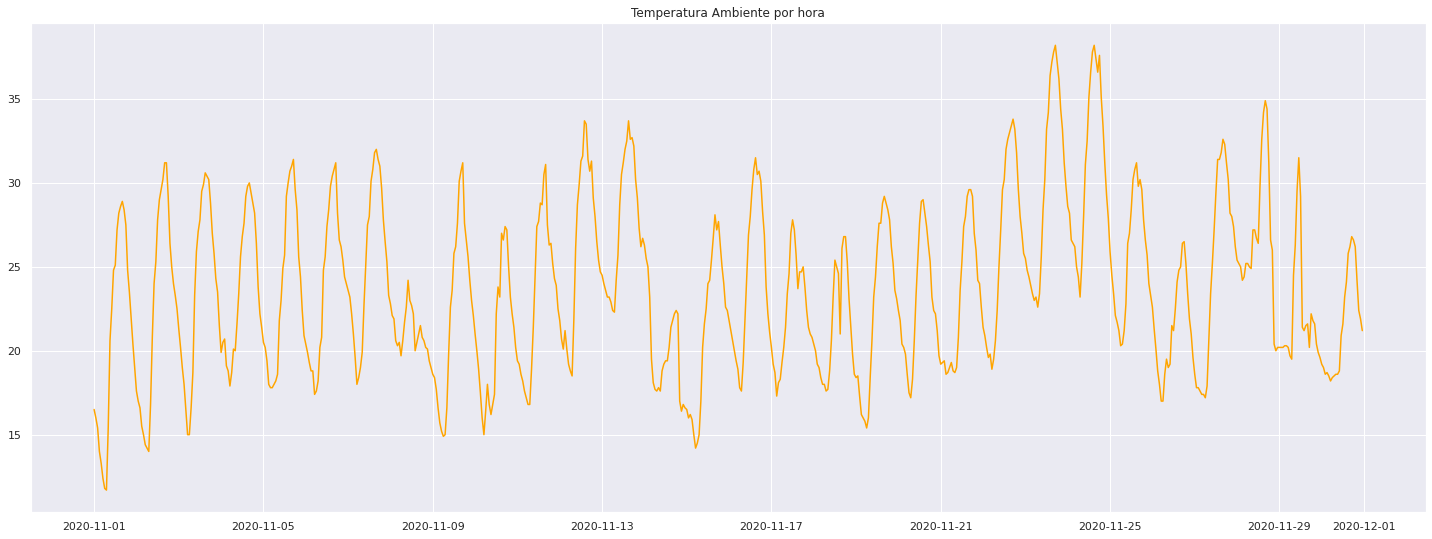

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_merged["TEMP"], color="orange")
ax1.set(title='Temperatura Ambiente por hora')
#ax1.plot( df_1["Temperature"],  color="steelblue")#seaborn.lineplot(data=df_1, x=df_1.index, y="Temperature")
#ax1.plot(df_industrial_groupby_minute_mean["Apparent_Energy_Total"], color="steelblue")
#ax1.plot(df_industrial_groupby_minute_mean["Reactive_Power_Total"], "black")
plt.show()

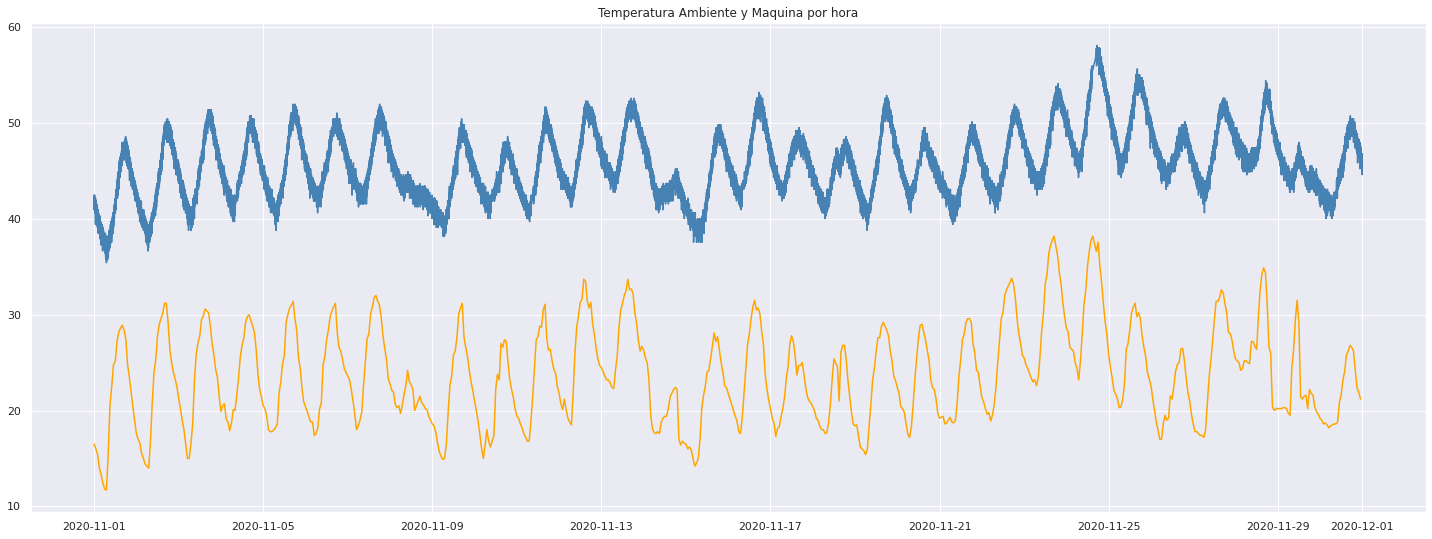

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_merged["TEMP"], color="orange")
ax1.set(title='Temperatura Ambiente y Maquina por hora')
ax1.plot( df_1["Temperature"],  color="steelblue")#seaborn.lineplot(data=df_1, x=df_1.index, y="Temperature")
#ax1.plot(df_industrial_groupby_minute_mean["Apparent_Energy_Total"], color="steelblue")
#ax1.plot(df_industrial_groupby_minute_mean["Reactive_Power_Total"], "black")
plt.show()

Text(0.5, 0.98, 'Temperatura Ambiente Vs Temperatura Maquina')

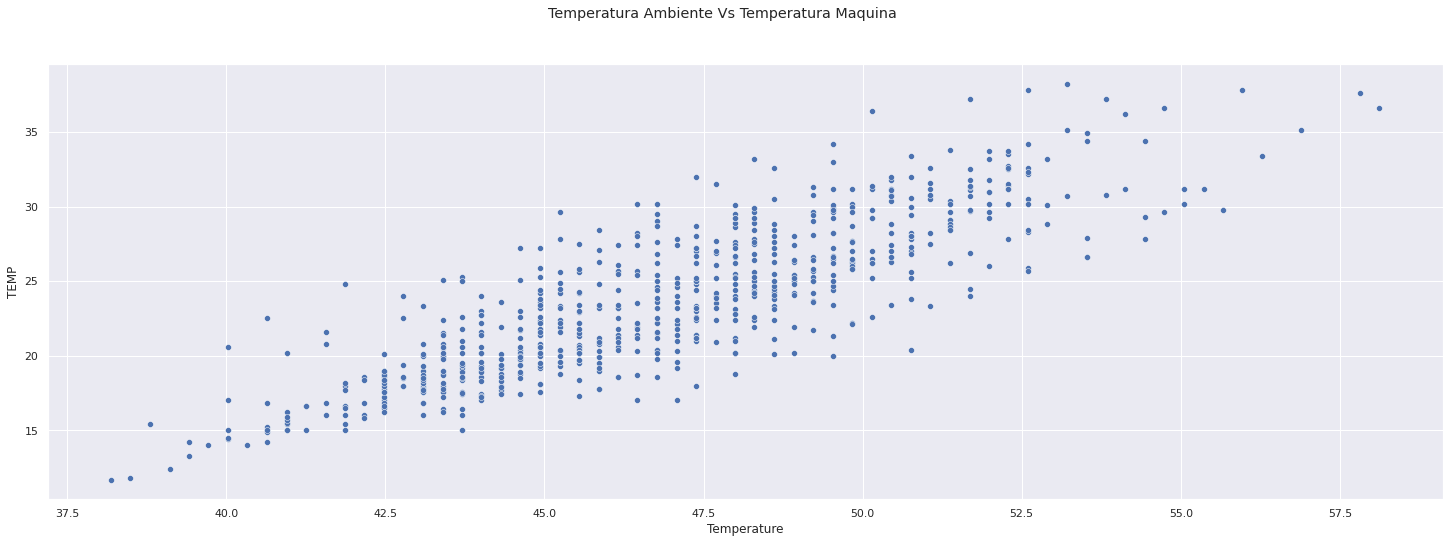

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.scatterplot(data=df_merged, y='TEMP', x='Temperature')
fig.suptitle('Temperatura Ambiente Vs Temperatura Maquina')


En los graficos anteriores se puede ver que existe una alta relacion entre la Temperatura Ambiente y la Temperatura Maquina.

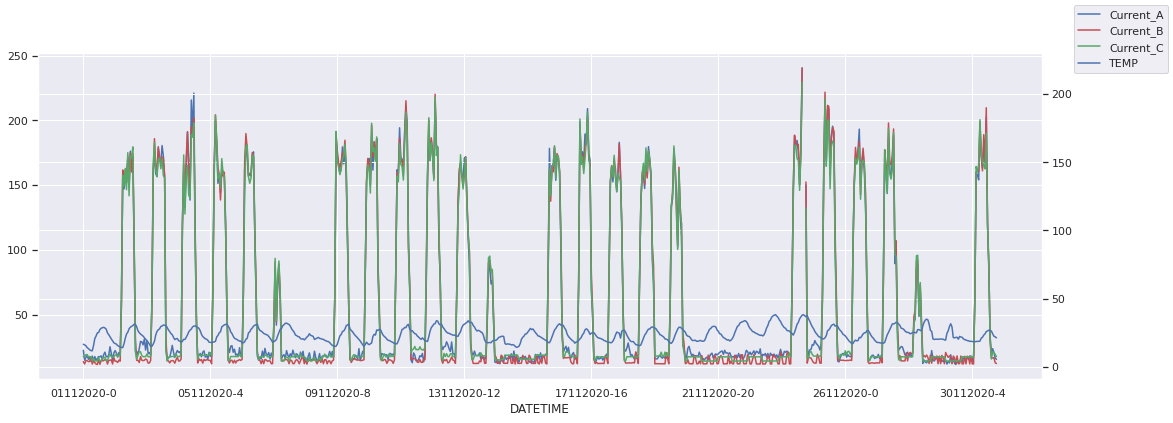

In [ ]:
seaborn.set(rc={'figure.figsize':(18,6)})
ax = df_merged.plot(x='DATETIME', y="Current_A", legend=False, color='b')
ax2 = ax.twinx()
df_merged.plot(x='DATETIME', y="Current_B", ax=ax2, legend=False, color="r")
df_merged.plot(x='DATETIME', y="Current_C", ax=ax2, legend=False, color="g")
df_merged.plot(x='DATETIME', y="TEMP", ax=ax2, legend=False)
ax.figure.legend()
plt.show()

### Creacion de CSV de Temperatura Ambiente

In [ ]:
df_cordoba_aero.sort_index()

FECHA HORA  TEMP HUM     PNM   DD  FF        NOMBRE  \
DATETIME                                                                      
2020-11-01 00:00:00  01112020    0  12.6  43  1022.6  320  11  CORDOBA AERO   
2020-11-01 01:00:00  01112020    1  12.1  46  1022.6  320  11  CORDOBA AERO   
2020-11-01 02:00:00  01112020    2  11.4  50  1022.1  340  13  CORDOBA AERO   
2020-11-01 03:00:00  01112020    3  11.3  51  1021.4  320  13  CORDOBA AERO   
2020-11-01 04:00:00  01112020    4   9.8  57  1020.9  320  13  CORDOBA AERO   
...                       ...  ...   ...  ..     ...  ...  ..           ...   
2020-11-30 19:00:00  30112020   19  24.0  45  1014.2   70  17  CORDOBA AERO   
2020-11-30 20:00:00  30112020   20  21.4  53  1014.9   50   9  CORDOBA AERO   
2020-11-30 21:00:00  30112020   21  19.0  67  1015.5   50   9  CORDOBA AERO   
2020-11-30 22:00:00  30112020   22  16.3  77  1016.6  360   9  CORDOBA AERO   
2020-11-30 23:00:00  30112020   23  16.8  74  1017.1  340   9  CORDOBA AERO   

                        DATETIME  
DATETIME                          
2020-11-01 00:00:00   01112020-0  
2020-11-01 01:00:00   01112020-1  
2020-11-01 02:00:00   01112020-2  
2020-11-01 03:00:00   01112020-3  
2020-11-01 04:00:00   01112020-4  
...                          ...  
2020-11-30 19:00:00  30112020-19  
2020-11-30 20:00:00  30112020-20  
2020-11-30 21:00:00  30112020-21  
2020-11-30 22:00:00  30112020-22  
2020-11-30 23:00:00  30112020-23  

[718 rows x 9 columns]

In [ ]:
df_cordoba_observatorio.to_csv('temps_cba_aero.csv')

# Multas de Facturación

### Multa por Factor de Potencia

Para el calculo de tarifa el proveedor de enregia electrica especifica lo siguiente en relación al facor de potencia

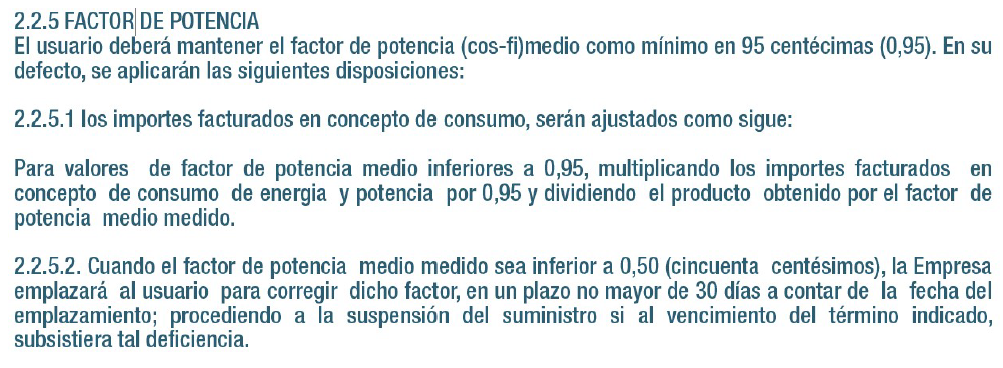

Calculo del factor de potencia media

In [ ]:
df_1['Power_Factor_Total'].mean()

0.8532473284456925

In [ ]:
df_1['Power_Factor_Total'].min(),

(0.35,)

In [ ]:
df_1['Power_Factor_Total'].max()

1.01

Se puede observar que el Factor de Potencia medio calculado indica que se deberia aplicar multa, pero dado que la prestataria del servicio no midio esta supuesta infracción el factor de Potencia Medio medido no se considerara para el resto del estudio.  

###Multa por Demanda Autorizada

Para el calculo de tarifa el proveedor de enregia electrica especifica lo siguiente en relación a la demanda autorizada

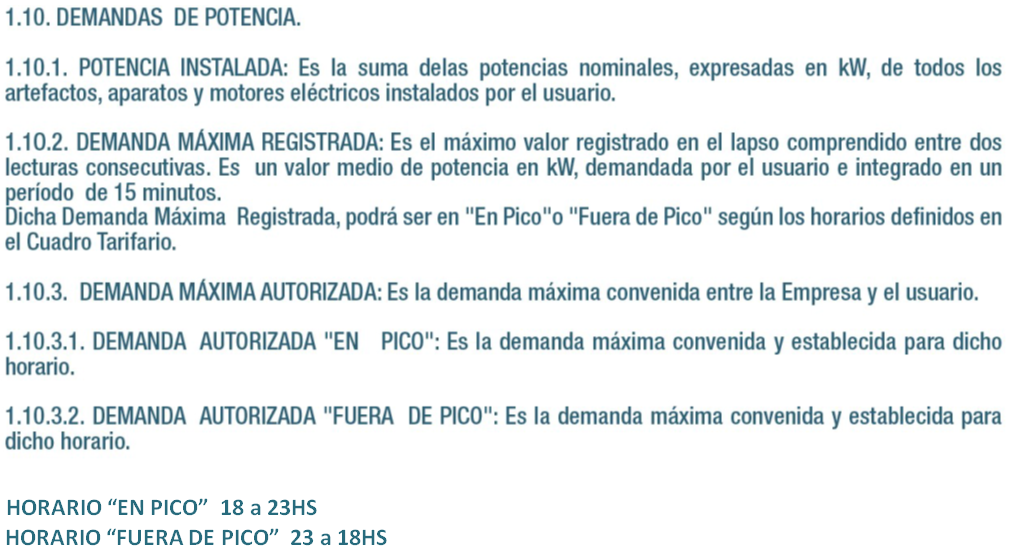

En funcion de esto se desarrollara un codigo y un dataset que indique si corresponde multa o no. Este sera util para crear un modelo que prediga si el usuario tendra multas o no en condiciones dadas

##Creaccion de Columna de Multa

Para esto se utiliza una agrupacón cada 15 minutos ya que la multa se calcula cada 15 minutos

In [ ]:
file_input = "file20201101_mes.csv"
df_1 = pandas.read_csv(file_input)

In [ ]:
df_1.index = pandas.to_datetime(
    df_1['createdAt'],
    errors="coerce",
    format='%Y%m%d %H:%M:%S.%f',
    ).dt.tz_convert(None)
    #2020-11-30 23:59:12.616

In [ ]:
df_1_grouped_15min = df_1.resample('15min').first()
df_1_grouped_15min['Active_Energy_Delivered']

createdAt
2020-11-01 00:00:00     95579.32
2020-11-01 00:15:00     95580.23
2020-11-01 00:30:00     95581.11
2020-11-01 00:45:00     95582.20
2020-11-01 01:00:00     95583.25
                         ...    
2020-11-30 22:45:00    107426.47
2020-11-30 23:00:00    107427.47
2020-11-30 23:15:00    107428.38
2020-11-30 23:30:00    107429.38
2020-11-30 23:45:00    107430.38
Freq: 15T, Name: Active_Energy_Delivered, Length: 2880, dtype: float64

In [ ]:
df_1_grouped_15min['hour_col'] = df_1_grouped_15min.index.hour  #add hours column
df_1_grouped_15min['Potencia_Media'] = df_1_grouped_15min['Active_Energy_Delivered'].diff() /0.25
df_1_grouped_15min.tail(5)

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2020-11-30 22:45:00                107426.47                   3.60   
2020-11-30 23:00:00                107427.47                   4.00   
2020-11-30 23:15:00                107428.38                   3.66   
2020-11-30 23:30:00                107429.38                   3.88   
2020-11-30 23:45:00                107430.38                   3.88   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2020-11-30 22:45:00                  362.77                107063.70   
2020-11-30 23:00:00                  362.77                107064.70   
2020-11-30 23:15:00                  362.77                107065.62   
2020-11-30 23:30:00                  362.77                107066.61   
2020-11-30 23:45:00                  362.77                107067.61   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2020-11-30 22:45:00                107789.25            1.77            0.36   
2020-11-30 23:00:00                107790.24            2.74            0.35   
2020-11-30 23:15:00                107791.16            1.91            0.43   
2020-11-30 23:30:00                107792.15            2.21            0.42   
2020-11-30 23:45:00                107793.15            2.73            0.34   

                     Active_Power_C  Active_Power_Total  \
createdAt                                                 
2020-11-30 22:45:00            0.98                3.11   
2020-11-30 23:00:00            0.98                4.06   
2020-11-30 23:15:00            0.98                3.31   
2020-11-30 23:30:00            1.56                4.19   
2020-11-30 23:45:00            0.85                3.92   

                     Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                                  
2020-11-30 22:45:00                  138877.28                    906.87   
2020-11-30 23:00:00                  138878.30                    906.87   
2020-11-30 23:15:00                  138879.27                    906.87   
2020-11-30 23:30:00                  138880.30                    906.87   
2020-11-30 23:45:00                  138881.34                    906.87   

                     Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                          
2020-11-30 22:45:00                        4.0              1.94   
2020-11-30 23:00:00                        4.0              2.91   
2020-11-30 23:15:00                        4.0              2.11   
2020-11-30 23:30:00                        4.0              2.59   
2020-11-30 23:45:00                        4.0              2.92   

                     Apparent_Power_B  Apparent_Power_C  Apparent_Power_Total  \
createdAt                                                                       
2020-11-30 22:45:00              0.45              1.01                  3.22   
2020-11-30 23:00:00              0.44              1.00                  4.19   
2020-11-30 23:15:00              0.54              1.00                  3.46   
2020-11-30 23:30:00              0.53              1.59                  4.41   
2020-11-30 23:45:00              0.43              0.90                  4.04   

                     Current_A  Current_Avg  Current_B  Current_C  Current_G  \
createdAt                                                                      
2020-11-30 22:45:00       8.30          0.0       1.93       4.32       13.0   
2020-11-30 23:00:00      12.69          0.0       1.89       4.36       13.0   
2020-11-30 23:15:00       9.16          0.0       2.34       4.36       13.0   
2020-11-30 23:30:00      11.21          0.0       2.32       6.93

In [ ]:
df_1_grouped_15min['Potencia_Media'].max()

102.96000000002095

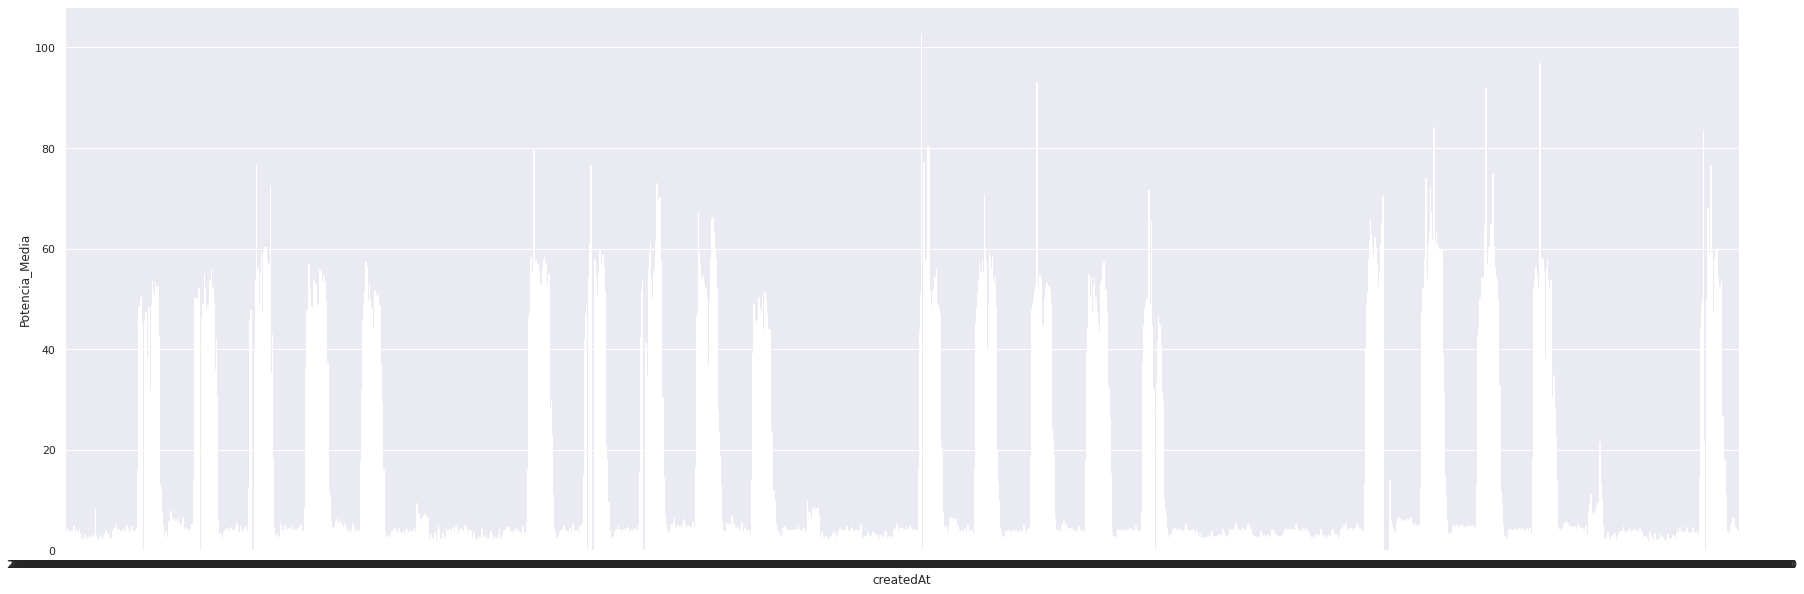

In [ ]:
plt.figure(figsize=(30,10))
seaborn.barplot(data=df_1_grouped_15min,
                 y=df_1_grouped_15min["Potencia_Media"],x=df_1_grouped_15min.index
                 )

In [ ]:
hora_pico_inicio = 18
hora_pico_fin =23
demanda_pico = 16.0 # 16.0
demanda_fuera = 61.0 # 61.0
#---------------------------------------------------------------------------------------------------------------------------------------------
filt_pico = (df_1_grouped_15min['Potencia_Media'] > demanda_pico) & (df_1_grouped_15min['hour_col'] > hora_pico_inicio) & (df_1_grouped_15min['hour_col'] < hora_pico_fin)
filt_fuera = (df_1_grouped_15min['Potencia_Media'] > demanda_fuera) & (df_1_grouped_15min['hour_col'] < hora_pico_inicio) | (df_1_grouped_15min['hour_col'] > hora_pico_fin)
filt_multa_demanda = filt_fuera.add(filt_pico)
df_1_grouped_15min['multa'] = filt_multa_demanda
filt_multa_demanda.value_counts()

False    2822
True       58
dtype: int64

In [ ]:
filt_multa_demanda

createdAt
2020-11-01 00:00:00    False
2020-11-01 00:15:00    False
2020-11-01 00:30:00    False
2020-11-01 00:45:00    False
2020-11-01 01:00:00    False
                       ...  
2020-11-30 22:45:00    False
2020-11-30 23:00:00    False
2020-11-30 23:15:00    False
2020-11-30 23:30:00    False
2020-11-30 23:45:00    False
Freq: 15T, Length: 2880, dtype: bool

In [ ]:
df_1_grouped_15min.to_csv('df_1_grouped_15min.csv')

En los calculos anteriores se puede ver que 58 veces se sobrepaso la demanda autorizada por lo que corresponderia multa

## Modelo de Predicción de Multa

### Leemos los archivos CSV con datos de un año

In [ ]:
df_1 = pandas.read_csv('https://raw.githubusercontent.com/agustinabdala/diplodatos/main/df_1_grouped_15min.csv', parse_dates=['createdAt'])
df_1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


createdAt  Active_Energy_Delivered  Active_Energy_LastDay  \
0     2021-01-01 00:00:00                119489.99                   4.10   
1     2021-01-01 00:15:00                119491.10                   3.95   
2     2021-01-01 00:30:00                119492.08                   4.22   
3     2021-01-01 00:45:00                119493.08                   4.04   
4     2021-01-01 01:00:00                119494.09                   3.92   
...                   ...                      ...                    ...   
43675 2022-03-31 22:45:00                294244.22                   3.93   
43676 2022-03-31 23:00:00                294245.25                   4.07   
43677 2022-03-31 23:15:00                294246.28                   4.17   
43678 2022-03-31 23:30:00                294247.25                   4.12   
43679 2022-03-31 23:45:00                294248.19                   3.58   

       Active_Energy_Received  Active_Energy_del_m_rec  \
0                      370.45                119119.55   
1                      370.45                119120.66   
2                      370.45                119121.64   
3                      370.45                119122.64   
4                      370.45                119123.64   
...                       ...                      ...   
43675                  433.30                293810.91   
43676                  433.30                293811.94   
43677                  433.30                293812.97   
43678                  433.30                293813.94   
43679                  433.30                293814.88   

       Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
0                    119860.44            3.71            0.35   
1                    119861.55            2.15            0.43   
2                    119862.53            2.31            0.37   
3                    119863.53            2.89            0.37   
4                    119864.54            2.15            0.37   
...                        ...             ...             ...   
43675                294677.53            2.70            0.34   
43676                294678.56            2.79            0.34   
43677                294679.56            2.59            0.34   
43678                294680.56            1.79            0.34   
43679                294681.50            2.36            0.34   

       Active_Power_C  Active_Power_Total  Apparent_Energy_Delivered  \
0                1.70                5.76                  155397.44   
1                0.82                3.39                  155398.59   
2                0.82                3.50                  155399.64   
3                0.96                4.23                  155400.69   
4                0.96                3.48                  155401.75   
...               ...                 ...                        ...   
43675            1.25                4.30                  385317.03   
43676            1.26                4.39                  385318.06   
43677            1.13                4.06                  385319.06   
43678            1.13                3.26                  385320.06   
43679            1.26                3.96                  385321.03   

       Apparent_Energy_Received  Apparent_Energy_del_p_rec  Apparent_Power_A  \
0                        930.37                        4.0              3.93   
1                        930.37                        4.0              2.45   
2                        930.37                        4.0              2.65   
3                        930.37                        4.0              3.12   
4                        930.37                        4.0              2.45   
...                         ...                        ...               ...   
43675                   1145.85                        4.0              2.89   
43676                   1145.85                        4.0              3.00   
43677           

In [ ]:
df_1.index = pandas.to_datetime(
    df_1['createdAt'],
    errors="coerce",
    format='%Y%m%d %H:%M:%S.%f',
    )
df_1=df_1.drop('createdAt', axis=1
           )
    #2020-11-30 23:59:12.616

In [ ]:
df_1['hour_col'] = df_1.index.hour  #add hours column
df_1['close_diff'] = df_1['Active_Energy_Delivered'].diff() /0.25
df_1.tail(5)

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2022-03-31 22:45:00                294244.22                   3.93   
2022-03-31 23:00:00                294245.25                   4.07   
2022-03-31 23:15:00                294246.28                   4.17   
2022-03-31 23:30:00                294247.25                   4.12   
2022-03-31 23:45:00                294248.19                   3.58   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2022-03-31 22:45:00                   433.3                293810.91   
2022-03-31 23:00:00                   433.3                293811.94   
2022-03-31 23:15:00                   433.3                293812.97   
2022-03-31 23:30:00                   433.3                293813.94   
2022-03-31 23:45:00                   433.3                293814.88   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2022-03-31 22:45:00                294677.53            2.70            0.34   
2022-03-31 23:00:00                294678.56            2.79            0.34   
2022-03-31 23:15:00                294679.56            2.59            0.34   
2022-03-31 23:30:00                294680.56            1.79            0.34   
2022-03-31 23:45:00                294681.50            2.36            0.34   

                     Active_Power_C  Active_Power_Total  \
createdAt                                                 
2022-03-31 22:45:00            1.25                4.30   
2022-03-31 23:00:00            1.26                4.39   
2022-03-31 23:15:00            1.13                4.06   
2022-03-31 23:30:00            1.13                3.26   
2022-03-31 23:45:00            1.26                3.96   

                     Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                                  
2022-03-31 22:45:00                  385317.03                   1145.85   
2022-03-31 23:00:00                  385318.06                   1145.85   
2022-03-31 23:15:00                  385319.06                   1145.85   
2022-03-31 23:30:00                  385320.06                   1145.85   
2022-03-31 23:45:00                  385321.03                   1145.85   

                     Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                          
2022-03-31 22:45:00                        4.0              2.89   
2022-03-31 23:00:00                        4.0              3.00   
2022-03-31 23:15:00                        4.0              2.72   
2022-03-31 23:30:00                        4.0              1.92   
2022-03-31 23:45:00                        4.0              2.41   

                     Apparent_Power_B  Apparent_Power_C  Apparent_Power_Total  \
createdAt                                                                       
2022-03-31 22:45:00              0.47              1.32                  4.40   
2022-03-31 23:00:00              0.47              1.32                  4.50   
2022-03-31 23:15:00              0.47              1.27                  4.10   
2022-03-31 23:30:00              0.47              1.27                  3.29   
2022-03-31 23:45:00              0.48              1.32                  3.98   

                     Current_A  Current_Avg  Current_B  Current_C  Current_G  \
createdAt                                                                      
2022-03-31 22:45:00      14.09          0.0       2.00       5.64       13.0   
2022-03-31 23:00:00      10.16          0.0       2.01       5.63       13.0   
2022-03-31 23:15:00      11.61          0.0       1.99       5.42       13.0   
2022-03-31 23:30:00       8.16          0.0       2.01       5.41

In [ ]:
hora_pico_inicio = 18
hora_pico_fin =23
demanda_pico = 16.0 # 16.0
demanda_fuera = 61.0 # 61.0
#---------------------------------------------------------------------------------------------------------------------------------------------
filt_pico = (df_1['close_diff'] > demanda_pico) & (df_1['hour_col'] > hora_pico_inicio) & (df_1['hour_col'] < hora_pico_fin)
filt_fuera = (df_1['close_diff'] > demanda_fuera) & (df_1['hour_col'] < hora_pico_inicio) | (df_1['hour_col'] > hora_pico_fin)
filt_multa_demanda = filt_fuera.add(filt_pico)
df_1['multa'] = filt_multa_demanda
filt_multa_demanda.value_counts()

False    42690
True       990
dtype: int64

In [ ]:
df_1.head(3)

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2021-01-01 00:00:00                119489.99                   4.10   
2021-01-01 00:15:00                119491.10                   3.95   
2021-01-01 00:30:00                119492.08                   4.22   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2021-01-01 00:00:00                  370.45                119119.55   
2021-01-01 00:15:00                  370.45                119120.66   
2021-01-01 00:30:00                  370.45                119121.64   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2021-01-01 00:00:00                119860.44            3.71            0.35   
2021-01-01 00:15:00                119861.55            2.15            0.43   
2021-01-01 00:30:00                119862.53            2.31            0.37   

                     Active_Power_C  Active_Power_Total  \
createdAt                                                 
2021-01-01 00:00:00            1.70                5.76   
2021-01-01 00:15:00            0.82                3.39   
2021-01-01 00:30:00            0.82                3.50   

                     Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                                  
2021-01-01 00:00:00                  155397.44                    930.37   
2021-01-01 00:15:00                  155398.59                    930.37   
2021-01-01 00:30:00                  155399.64                    930.37   

                     Apparent_Energy_del_p_rec  Apparent_Power_A  \
createdAt                                                          
2021-01-01 00:00:00                        4.0              3.93   
2021-01-01 00:15:00                        4.0              2.45   
2021-01-01 00:30:00                        4.0              2.65   

                     Apparent_Power_B  Apparent_Power_C  Apparent_Power_Total  \
createdAt                                                                       
2021-01-01 00:00:00              0.45              1.72                  5.92   
2021-01-01 00:15:00              0.54              0.88                  3.59   
2021-01-01 00:30:00              0.47              0.88                  3.72   

                     Current_A  Current_Avg  Current_B  Current_C  Current_G  \
createdAt                                                                      
2021-01-01 00:00:00      16.85          0.0       1.89       7.32       13.0   
2021-01-01 00:15:00      10.39          0.0       2.29       3.75       13.0   
2021-01-01 00:30:00      11.28          0.0       2.01       3.75       13.0   

                     Current_N  Current_UNB_A  Current_UNB_B  Current_UNB_C  \
createdAt                                                                     
2021-01-01 00:00:00      11.23            2.0            1.0            2.0   
2021-01-01 00:15:00       6.53            2.0            1.0            2.0   
2021-01-01 00:30:00       7.74            2.0            1.0            2.0   

                     Current_UNB_Worst  Energy_Acum_Datetime  Frequency  \
createdAt                                                                 
2021-01-01 00:00:00                0.0                   0.0      50.01   
2021-01-01 00:15:00                0.0                   0.0      50.13   
2021-01-01 00:30:00                0.0                   0.0      50.04   

                     Power_Factor_A  Power_Factor_B  Power_Factor_C  \
createdAt                                                             
2021-01-01 00:00:00            0.94            0.79            1.01   
2021-01-01 00:15:00            0.88            0.80            1.07   
2021-01-01 00:30:00   

### Procesamineto de datos

In [ ]:
import pandas
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print(df_1.shape)
print(df_1.describe())
imputer_cols = ['Active_Energy_Delivered', 'Active_Energy_LastDay',
       'Active_Energy_Received', 'Active_Energy_del_m_rec',
       'Active_Energy_del_p_rec', 'Active_Power_A', 'Active_Power_B',
       'Active_Power_C', 'Active_Power_Total', 'Apparent_Energy_Delivered',
       'Apparent_Energy_Received', 'Apparent_Energy_del_p_rec',
       'Apparent_Power_A', 'Apparent_Power_B', 'Apparent_Power_C',
       'Apparent_Power_Total', 'Current_A', 'Current_Avg', 'Current_B',
       'Current_C', 'Current_G', 'Current_N', 'Current_UNB_A', 'Current_UNB_B',
       'Current_UNB_C', 'Current_UNB_Worst', 'Energy_Acum_Datetime',
       'Frequency', 'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Reactive_Energy_Delivered',
       'Reactive_Energy_Received', 'Reactive_Energy_del_m_rec',
       'Reactive_Energy_del_p_rec', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Temperature',
       'Voltage_A_B', 'Voltage_A_N', 'Voltage_B_C', 'Voltage_B_N',
       'Voltage_C_A', 'Voltage_C_N', 'Voltage_L_L_Avg', 'Voltage_L_N_Avg',
       'Voltage_UNB_A_B', 'Voltage_UNB_A_N', 'Voltage_UNB_B_C',
       'Voltage_UNB_B_N', 'Voltage_UNB_C_A', 'Voltage_UNB_C_N',
       'Voltage_UNB_L_L_Worst', 'Voltage_UNB_L_N_Worst', 'rsrv1',
       'rsrv2', 'rsrv3', 'rsrv4', 'hour_col', 'close_diff']


imputer = SimpleImputer(strategy="median")
#imputer = KNNImputer(n_neighbors=2)
df_1[imputer_cols] = imputer.fit_transform(df_1[imputer_cols])
y = df_1.multa
X = df_1.drop(['multa', '_id', 'createdAt.1'],axis=1)
X

(43680, 66)
       Active_Energy_Delivered  Active_Energy_LastDay  Active_Energy_Received  \
count             25950.000000           25950.000000            25950.000000   
mean             231912.243203              16.163459              412.582005   
std               49812.919957              21.091214               24.235264   
min                   0.000000              -0.630000                0.900000   
25%              213967.512500               3.860000              410.140000   
50%              242371.630000               4.630000              417.170000   
75%              270559.830000              16.457500              426.210000   
max              294248.190000              85.220000              433.300000   

       Active_Energy_del_m_rec  Active_Energy_del_p_rec  Active_Power_A  \
count             25950.000000             25950.000000    25950.000000   
mean             231499.662499            232324.826199        6.728100   
std               49792.862977   

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2021-01-01 00:00:00                119489.99                   4.10   
2021-01-01 00:15:00                119491.10                   3.95   
2021-01-01 00:30:00                119492.08                   4.22   
2021-01-01 00:45:00                119493.08                   4.04   
2021-01-01 01:00:00                119494.09                   3.92   
...                                      ...                    ...   
2022-03-31 22:45:00                294244.22                   3.93   
2022-03-31 23:00:00                294245.25                   4.07   
2022-03-31 23:15:00                294246.28                   4.17   
2022-03-31 23:30:00                294247.25                   4.12   
2022-03-31 23:45:00                294248.19                   3.58   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2021-01-01 00:00:00                  370.45                119119.55   
2021-01-01 00:15:00                  370.45                119120.66   
2021-01-01 00:30:00                  370.45                119121.64   
2021-01-01 00:45:00                  370.45                119122.64   
2021-01-01 01:00:00                  370.45                119123.64   
...                                     ...                      ...   
2022-03-31 22:45:00                  433.30                293810.91   
2022-03-31 23:00:00                  433.30                293811.94   
2022-03-31 23:15:00                  433.30                293812.97   
2022-03-31 23:30:00                  433.30                293813.94   
2022-03-31 23:45:00                  433.30                293814.88   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2021-01-01 00:00:00                119860.44            3.71            0.35   
2021-01-01 00:15:00                119861.55            2.15            0.43   
2021-01-01 00:30:00                119862.53            2.31            0.37   
2021-01-01 00:45:00                119863.53            2.89            0.37   
2021-01-01 01:00:00                119864.54            2.15            0.37   
...                                      ...             ...             ...   
2022-03-31 22:45:00                294677.53            2.70            0.34   
2022-03-31 23:00:00                294678.56            2.79            0.34   
2022-03-31 23:15:00                294679.56            2.59            0.34   
2022-03-31 23:30:00                294680.56            1.79            0.34   
2022-03-31 23:45:00                294681.50            2.36            0.34   

                     Active_Power_C  Active_Power_Total  \
createdAt                                                 
2021-01-01 00:00:00            1.70                5.76   
2021-01-01 00:15:00            0.82                3.39   
2021-01-01 00:30:00            0.82                3.50   
2021-01-01 00:45:00            0.96                4.23   
2021-01-01 01:00:00            0.96                3.48   
...                             ...                 ...   
2022-03-31 22:45:00            1.25                4.30   
2022-03-31 23:00:00            1.26                4.39   
2022-03-31 23:15:00            1.13                4.06   
2022-03-31 23:30:00            1.13                3.26   
2022-03-31 23:45:00            1.26                3.96   

                     Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                                  
2021-01-01 00:00:00                  155397.44                    930.37   
2021-01-01 00:15:00                  155398.59                    930.37   
2021-01-01 00:30:00                  155399.64 

In [ ]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pandas.DataFrame(X, columns=x_names)
X

Active_Energy_Delivered  Active_Energy_LastDay  Active_Energy_Received  \
0                    -3.011883              -0.428819               -2.338264   
1                    -3.011855              -0.437532               -2.338264   
2                    -3.011829              -0.421848               -2.338264   
3                    -3.011803              -0.432304               -2.338264   
4                    -3.011777              -0.439275               -2.338264   
...                        ...                    ...                     ...   
43675                 1.499553              -0.438694                1.002166   
43676                 1.499580              -0.430561                1.002166   
43677                 1.499607              -0.424752                1.002166   
43678                 1.499632              -0.427657                1.002166   
43679                 1.499656              -0.459025                1.002166   

       Active_Energy_del_m_rec  Active_Energy_del_p_rec  Active_Power_A  \
0                    -3.011962                -3.011805       -0.252569   
1                    -3.011933                -3.011776       -0.513691   
2                    -3.011908                -3.011751       -0.486909   
3                    -3.011882                -3.011725       -0.389825   
4                    -3.011856                -3.011699       -0.513691   
...                        ...                      ...             ...   
43675                 1.499671                 1.499436       -0.421629   
43676                 1.499698                 1.499463       -0.406564   
43677                 1.499724                 1.499488       -0.440041   
43678                 1.499749                 1.499514       -0.573950   
43679                 1.499774                 1.499538       -0.478540   

       Active_Power_B  Active_Power_C  Active_Power_Total  \
0           -0.422998       -0.295344           -0.326780   
1           -0.409658       -0.459169           -0.463991   
2           -0.419663       -0.459169           -0.457622   
3           -0.419663       -0.433106           -0.415359   
4           -0.419663       -0.433106           -0.458780   
...               ...             ...                 ...   
43675       -0.424665       -0.379118           -0.411307   
43676       -0.424665       -0.377256           -0.406096   
43677       -0.424665       -0.401458           -0.425201   
43678       -0.424665       -0.401458           -0.471517   
43679       -0.424665       -0.377256           -0.430991   

       Apparent_Energy_Delivered  Apparent_Energy_Received  \
0                      -3.029458                 -2.644806   
1                      -3.029435                 -2.644806   
2                      -3.029414                 -2.644806   
3                      -3.029394                 -2.644806   
4                      -3.029373                 -2.644806   
...                          ...                       ...   
43675                   1.482293                  1.171152   
43676                   1.482313                  1.171152   
43677                   1.482333                  1.171152   
43678                   1.482353                  1.171152   
43679                   1.482372                  1.171152   

       Apparent_Energy_del_p_rec  Apparent_Power_A  Apparent_Power_B  \
0                            0.0         -0.307877         -0.420906   
1                            0.0         -0.486585         -0.410062   
2                            0.0         -0.462435         -0.418496   
3                            0.0         -0.405683         -0.418496   
4                            0.0         -0.486585         -0.418496   
...                          ...               ...               ...   
43675                        0.0         -0.433455         -0.418496   
43676                        0.0         -0.420173         -0.418496   
43677  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 2022)

### Planteo modelos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

clfs = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    #plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Nearest Neighbors
Accuracy train Nearest Neighbors: 99.33%
Accuracy test Nearest Neighbors: 98.42%
Linear SVM
Accuracy train Linear SVM: 99.02%
Accuracy test Linear SVM: 98.87%
RBF SVM
Accuracy train RBF SVM: 99.97%
Accuracy test RBF SVM: 97.60%
Decision Tree
Accuracy train Decision Tree: 100.00%
Accuracy test Decision Tree: 99.99%
Random Forest
Accuracy train Random Forest: 98.71%
Accuracy test Random Forest: 98.43%
Neural Net
Accuracy train Neural Net: 98.76%
Accuracy test Neural Net: 98.66%
AdaBoost
Accuracy train AdaBoost: 100.00%
Accuracy test AdaBoost: 99.99%
Naive Bayes
Accuracy train Naive Bayes: 90.42%
Accuracy test Naive Bayes: 90.32%
QDA
Accuracy train QDA: 88.51%
Accuracy test QDA: 88.59%


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy test QDA: 88.59%


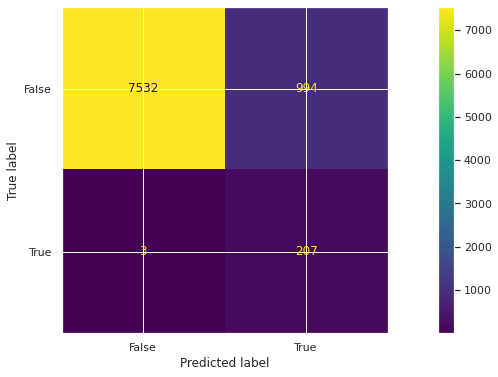

In [ ]:
test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, train_predictions)
print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

Como se Puede ver utilizando un Arbol de Decisión o un modelos Adaboost se puede obtener un Accuracy de 99.99% en la prediccion de la multa.

## Prediccion de Demanda

Para la Predicción de la demanda se utilizara un modelo de Regresion Lineal para predecir la Potencia Activa Total.

In [ ]:
print(df_1.shape)
print(df_1.describe())
imputer_cols = ['Active_Energy_Delivered', 'Active_Energy_LastDay',
       'Active_Energy_Received', 'Active_Energy_del_m_rec',
       'Active_Energy_del_p_rec', 'Active_Power_A', 'Active_Power_B',
       'Active_Power_C', 'Active_Power_Total', 'Apparent_Energy_Delivered',
       'Apparent_Energy_Received', 'Apparent_Energy_del_p_rec',
       'Apparent_Power_A', 'Apparent_Power_B', 'Apparent_Power_C',
       'Apparent_Power_Total', 'Current_A', 'Current_Avg', 'Current_B',
       'Current_C', 'Current_G', 'Current_N', 'Current_UNB_A', 'Current_UNB_B',
       'Current_UNB_C', 'Current_UNB_Worst', 'Energy_Acum_Datetime',
       'Frequency', 'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Reactive_Energy_Delivered',
       'Reactive_Energy_Received', 'Reactive_Energy_del_m_rec',
       'Reactive_Energy_del_p_rec', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Temperature',
       'Voltage_A_B', 'Voltage_A_N', 'Voltage_B_C', 'Voltage_B_N',
       'Voltage_C_A', 'Voltage_C_N', 'Voltage_L_L_Avg', 'Voltage_L_N_Avg',
       'Voltage_UNB_A_B', 'Voltage_UNB_A_N', 'Voltage_UNB_B_C',
       'Voltage_UNB_B_N', 'Voltage_UNB_C_A', 'Voltage_UNB_C_N',
       'Voltage_UNB_L_L_Worst', 'Voltage_UNB_L_N_Worst', 'rsrv1',
       'rsrv2', 'rsrv3', 'rsrv4', 'hour_col', 'close_diff']


imputer = SimpleImputer(strategy="median")
#imputer = KNNImputer(n_neighbors=2)
df_1[imputer_cols] = imputer.fit_transform(df_1[imputer_cols])
y = df_1.Active_Power_Total
X = df_1.drop(['Active_Power_Total','close_diff', '_id', 'createdAt.1'],axis=1)
X

(43680, 66)
       Active_Energy_Delivered  Active_Energy_LastDay  Active_Energy_Received  \
count             43680.000000           43680.000000            43680.000000   
mean             236157.777267              11.481952              414.444303   
std               38736.270803              17.214824               18.815161   
min                   0.000000              -0.630000                0.900000   
25%              231752.185000               4.410000              417.050000   
50%              242371.630000               4.630000              417.170000   
75%              250703.122500               4.910000              418.290000   
max              294248.190000              85.220000              433.300000   

       Active_Energy_del_m_rec  Active_Energy_del_p_rec  Active_Power_A  \
count             43680.000000             43680.000000    43680.000000   
mean             235743.331708            236572.220128        5.218899   
std               38720.648863   

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2021-01-01 00:00:00                119489.99                   4.10   
2021-01-01 00:15:00                119491.10                   3.95   
2021-01-01 00:30:00                119492.08                   4.22   
2021-01-01 00:45:00                119493.08                   4.04   
2021-01-01 01:00:00                119494.09                   3.92   
...                                      ...                    ...   
2022-03-31 22:45:00                294244.22                   3.93   
2022-03-31 23:00:00                294245.25                   4.07   
2022-03-31 23:15:00                294246.28                   4.17   
2022-03-31 23:30:00                294247.25                   4.12   
2022-03-31 23:45:00                294248.19                   3.58   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2021-01-01 00:00:00                  370.45                119119.55   
2021-01-01 00:15:00                  370.45                119120.66   
2021-01-01 00:30:00                  370.45                119121.64   
2021-01-01 00:45:00                  370.45                119122.64   
2021-01-01 01:00:00                  370.45                119123.64   
...                                     ...                      ...   
2022-03-31 22:45:00                  433.30                293810.91   
2022-03-31 23:00:00                  433.30                293811.94   
2022-03-31 23:15:00                  433.30                293812.97   
2022-03-31 23:30:00                  433.30                293813.94   
2022-03-31 23:45:00                  433.30                293814.88   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2021-01-01 00:00:00                119860.44            3.71            0.35   
2021-01-01 00:15:00                119861.55            2.15            0.43   
2021-01-01 00:30:00                119862.53            2.31            0.37   
2021-01-01 00:45:00                119863.53            2.89            0.37   
2021-01-01 01:00:00                119864.54            2.15            0.37   
...                                      ...             ...             ...   
2022-03-31 22:45:00                294677.53            2.70            0.34   
2022-03-31 23:00:00                294678.56            2.79            0.34   
2022-03-31 23:15:00                294679.56            2.59            0.34   
2022-03-31 23:30:00                294680.56            1.79            0.34   
2022-03-31 23:45:00                294681.50            2.36            0.34   

                     Active_Power_C  Apparent_Energy_Delivered  \
createdAt                                                        
2021-01-01 00:00:00            1.70                  155397.44   
2021-01-01 00:15:00            0.82                  155398.59   
2021-01-01 00:30:00            0.82                  155399.64   
2021-01-01 00:45:00            0.96                  155400.69   
2021-01-01 01:00:00            0.96                  155401.75   
...                             ...                        ...   
2022-03-31 22:45:00            1.25                  385317.03   
2022-03-31 23:00:00            1.26                  385318.06   
2022-03-31 23:15:00            1.13                  385319.06   
2022-03-31 23:30:00            1.13                  385320.06   
2022-03-31 23:45:00            1.26                  385321.03   

                     Apparent_Energy_Received  Apparent_Energy_del_p_rec  \
createdAt                                                                  
2021-01-01 00:00:00                    930.37                        4.0   
2021-01-01 00:15:00             

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)
X_train.shape, X_test.shape

((34944, 62), (8736, 62))

In [ ]:
#convertimos en vector
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
#X_train.shape, X_test.shape

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(X_train, y_train) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 4.50608982e-02 -3.74181544e-05  7.78737869e-03 -1.84097556e-02
 -2.66569030e-02  1.00495273e+00  9.95081904e-01  1.00042400e+00
  5.55718754e-06 -8.56201201e-05  1.00063846e-11 -5.22087741e-03
  2.77004944e-03  2.15358954e-03 -2.66768609e-05 -5.53211758e-05
 -2.98039371e-13 -3.24687361e-04  4.04156604e-04  1.68087766e-13
  2.23347357e-04  1.29452005e-13  1.66866521e-13 -7.29138971e-14
 -2.48134846e-14 -1.20459198e-14  1.31401729e-03  9.86110736e-03
 -8.18303852e-03  4.24351972e-03 -1.86847392e-02  7.86140162e-04
 -4.78587772e-03 -2.86387378e-03  2.07585826e-03  6.32010536e-01
  6.29686813e-01  6.31262366e-01 -6.31107589e-01 -1.21274675e-05
  0.00000000e+00  3.08024056e-01  0.00000000e+00  3.04115957e-01
  0.00000000e+00  3.10351034e-01  0.00000000e+00 -9.22781732e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.42836960e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.78638990e-05  4.7

In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
import numpy as np
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_test)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_test, prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 3.8037211750860954e-05
Raíz del Error Cuadrático Medio (RMSE) = 0.006167431535968677


In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9999998730105518


# Modelo de Predicción en función del valor de la Temperatura Ambiente

###Predicción Temperatura maquina con Temperatura de Ambiente







Text(0.5, 0.98, 'Temperatura Ambiente Vs Temperatura de Maquina')

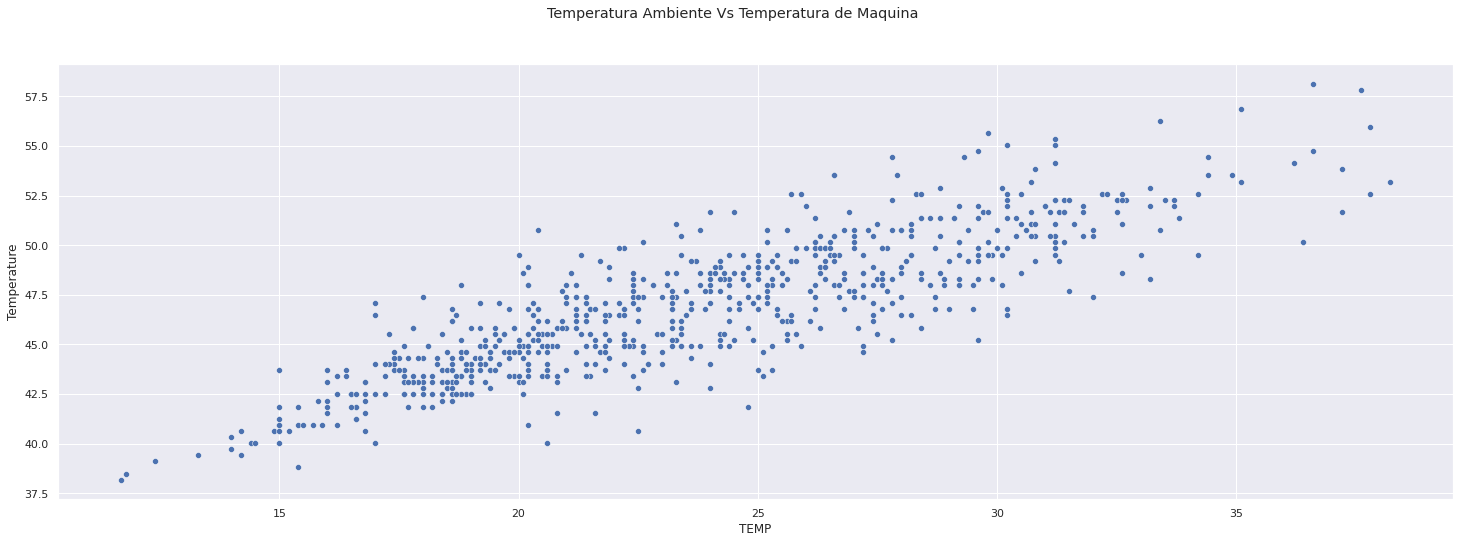

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.scatterplot(data=df_merged, y='Temperature', x='TEMP')
fig.suptitle('Temperatura Ambiente Vs Temperatura de Maquina')


In [ ]:
df_merged = df_merged.dropna(axis=0) #sacando 2 valores NAN
df_merged.loc[df_merged['Temperature'].isna()]

Empty DataFrame
Columns: [Current_A, Current_B, Current_C, Apparent_Power_A, Apparent_Power_B, Apparent_Power_C, Active_Power_Total, Temperature, FECHA, HORA, TEMP, HUM, PNM, DD, FF, NOMBRE, DATETIME, DATE, TIME]
Index: []

In [ ]:
from sklearn.model_selection import train_test_split
X= df_merged['TEMP']
y = df_merged['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=45)
X_train.shape, X_test.shape

((574,), (144,))

In [ ]:
#convertimos en vector
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train.shape, X_test.shape

((574, 1), (144, 1))

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(X_train, y_train) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.5791383], b = 33.19913903720583


In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
import numpy as np
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_test.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_test, prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 3.406652437094491
Raíz del Error Cuadrático Medio (RMSE) = 1.8457119052264064


In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X_test.reshape(-1,1), y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.7206338891474067


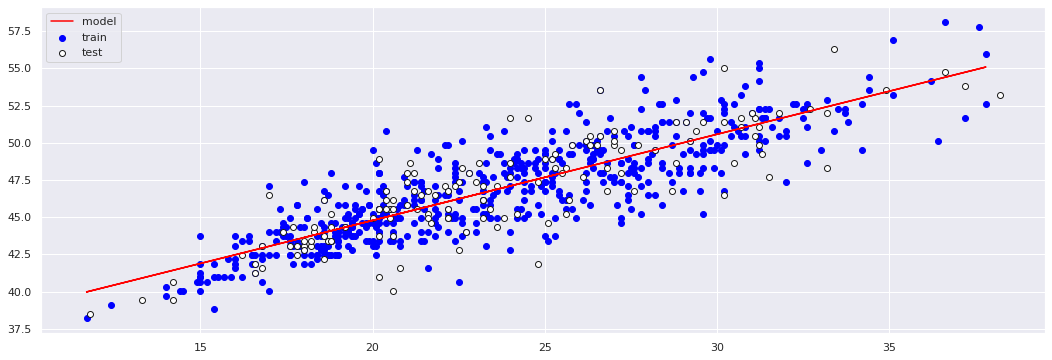

In [ ]:
#w = linear_least_squares(X_train, y_train)
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(X_train, regresion_lineal.predict(X_train.reshape(-1, 1)), color="red", label="model")
#plt.plot(x, f(X_train, w), color="red", label="model")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Prediccion de Temperatura de Maquina en funcion de las variables disponibles



Para la Predicción de la demanda se utilizara un modelo de Regresion Lineal para predecir la Potencia Activa Total.

In [ ]:
print(df_1.shape)
print(df_1.describe())
imputer_cols = ['Active_Energy_Delivered', 'Active_Energy_LastDay',
       'Active_Energy_Received', 'Active_Energy_del_m_rec',
       'Active_Energy_del_p_rec', 'Active_Power_A', 'Active_Power_B',
       'Active_Power_C', 'Active_Power_Total', 'Apparent_Energy_Delivered',
       'Apparent_Energy_Received', 'Apparent_Energy_del_p_rec',
       'Apparent_Power_A', 'Apparent_Power_B', 'Apparent_Power_C',
       'Apparent_Power_Total', 'Current_A', 'Current_Avg', 'Current_B',
       'Current_C', 'Current_G', 'Current_N', 'Current_UNB_A', 'Current_UNB_B',
       'Current_UNB_C', 'Current_UNB_Worst', 'Energy_Acum_Datetime',
       'Frequency', 'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Reactive_Energy_Delivered',
       'Reactive_Energy_Received', 'Reactive_Energy_del_m_rec',
       'Reactive_Energy_del_p_rec', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Temperature',
       'Voltage_A_B', 'Voltage_A_N', 'Voltage_B_C', 'Voltage_B_N',
       'Voltage_C_A', 'Voltage_C_N', 'Voltage_L_L_Avg', 'Voltage_L_N_Avg',
       'Voltage_UNB_A_B', 'Voltage_UNB_A_N', 'Voltage_UNB_B_C',
       'Voltage_UNB_B_N', 'Voltage_UNB_C_A', 'Voltage_UNB_C_N',
       'Voltage_UNB_L_L_Worst', 'Voltage_UNB_L_N_Worst', 'rsrv1',
       'rsrv2', 'rsrv3', 'rsrv4', 'hour_col', 'close_diff']


imputer = SimpleImputer(strategy="median")
#imputer = KNNImputer(n_neighbors=2)
df_1[imputer_cols] = imputer.fit_transform(df_1[imputer_cols])
y = df_1.Temperature
X = df_1.drop(['Temperature','close_diff', '_id', 'createdAt.1'],axis=1)
X

(43680, 66)
       Active_Energy_Delivered  Active_Energy_LastDay  Active_Energy_Received  \
count             43680.000000           43680.000000            43680.000000   
mean             236157.777267              11.481952              414.444303   
std               38736.270803              17.214824               18.815161   
min                   0.000000              -0.630000                0.900000   
25%              231752.185000               4.410000              417.050000   
50%              242371.630000               4.630000              417.170000   
75%              250703.122500               4.910000              418.290000   
max              294248.190000              85.220000              433.300000   

       Active_Energy_del_m_rec  Active_Energy_del_p_rec  Active_Power_A  \
count             43680.000000             43680.000000    43680.000000   
mean             235743.331708            236572.220128        5.218899   
std               38720.648863   

Active_Energy_Delivered  Active_Energy_LastDay  \
createdAt                                                             
2021-01-01 00:00:00                119489.99                   4.10   
2021-01-01 00:15:00                119491.10                   3.95   
2021-01-01 00:30:00                119492.08                   4.22   
2021-01-01 00:45:00                119493.08                   4.04   
2021-01-01 01:00:00                119494.09                   3.92   
...                                      ...                    ...   
2022-03-31 22:45:00                294244.22                   3.93   
2022-03-31 23:00:00                294245.25                   4.07   
2022-03-31 23:15:00                294246.28                   4.17   
2022-03-31 23:30:00                294247.25                   4.12   
2022-03-31 23:45:00                294248.19                   3.58   

                     Active_Energy_Received  Active_Energy_del_m_rec  \
createdAt                                                              
2021-01-01 00:00:00                  370.45                119119.55   
2021-01-01 00:15:00                  370.45                119120.66   
2021-01-01 00:30:00                  370.45                119121.64   
2021-01-01 00:45:00                  370.45                119122.64   
2021-01-01 01:00:00                  370.45                119123.64   
...                                     ...                      ...   
2022-03-31 22:45:00                  433.30                293810.91   
2022-03-31 23:00:00                  433.30                293811.94   
2022-03-31 23:15:00                  433.30                293812.97   
2022-03-31 23:30:00                  433.30                293813.94   
2022-03-31 23:45:00                  433.30                293814.88   

                     Active_Energy_del_p_rec  Active_Power_A  Active_Power_B  \
createdAt                                                                      
2021-01-01 00:00:00                119860.44            3.71            0.35   
2021-01-01 00:15:00                119861.55            2.15            0.43   
2021-01-01 00:30:00                119862.53            2.31            0.37   
2021-01-01 00:45:00                119863.53            2.89            0.37   
2021-01-01 01:00:00                119864.54            2.15            0.37   
...                                      ...             ...             ...   
2022-03-31 22:45:00                294677.53            2.70            0.34   
2022-03-31 23:00:00                294678.56            2.79            0.34   
2022-03-31 23:15:00                294679.56            2.59            0.34   
2022-03-31 23:30:00                294680.56            1.79            0.34   
2022-03-31 23:45:00                294681.50            2.36            0.34   

                     Active_Power_C  Active_Power_Total  \
createdAt                                                 
2021-01-01 00:00:00            1.70                5.76   
2021-01-01 00:15:00            0.82                3.39   
2021-01-01 00:30:00            0.82                3.50   
2021-01-01 00:45:00            0.96                4.23   
2021-01-01 01:00:00            0.96                3.48   
...                             ...                 ...   
2022-03-31 22:45:00            1.25                4.30   
2022-03-31 23:00:00            1.26                4.39   
2022-03-31 23:15:00            1.13                4.06   
2022-03-31 23:30:00            1.13                3.26   
2022-03-31 23:45:00            1.26                3.96   

                     Apparent_Energy_Delivered  Apparent_Energy_Received  \
createdAt                                                                  
2021-01-01 00:00:00                  155397.44                    930.37   
2021-01-01 00:15:00                  155398.59                    930.37   
2021-01-01 00:30:00                  155399.64 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)
X_train.shape, X_test.shape

((34944, 62), (8736, 62))

In [ ]:
#convertimos en vector
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
#X_train.shape, X_test.shape

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(X_train, y_train) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 1.87493247e-01  1.16337987e-01  2.65998659e+01  1.39001816e+01
 -1.40343289e+01  1.92261900e+00  2.16322142e+00 -4.65236473e-01
 -1.08574373e+00 -6.61938602e-02  3.34862785e-01 -7.13474210e-11
 -3.97534627e-01 -8.69773123e-01  5.35796017e-01  1.72382678e-01
  3.48378565e-01  1.69397829e-12 -2.24938198e-01 -1.53438488e-01
 -8.02025113e-13 -1.76426906e-01  1.29363187e-12  3.91175980e-12
 -8.58424443e-13  3.43280959e-13  8.50500226e-13  2.02018352e+00
 -7.80480060e-01  2.73134095e+00 -2.94192218e+00 -9.45915436e+00
 -1.96591873e-01 -5.49984150e+00 -2.60265310e+00  2.84070877e+00
 -1.88852053e-01 -6.76792836e-01 -1.01675607e+00  5.31436567e-01
  0.00000000e+00  2.35571869e+00  0.00000000e+00  1.75041693e+00
  0.00000000e+00  3.46077991e-01  0.00000000e+00 -4.53554695e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.85585727e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.13174538e-01  5.7

In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
import numpy as np
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_test)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_test, prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 7.76914278479975
Raíz del Error Cuadrático Medio (RMSE) = 2.787318206592091


In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.6507747005996595


# Conclusiones tercer Entregable

Durante la ejecución de este tercer entregable  realizamos modelos predicción teniendo un cuenta un nuevo dataset con datos de un año de producción
En una primera instancia se creó un código que agrupa datos cada 15 minutos e informa si se tiene multa  en función de los horarios y valores permitidos por la proveedora de Energia Eléctrica.
Luego de esto se creó un modelo de predicción de dichas multas en función de los factores de producción con valores de Accuracy elevado, lo que garantiza una buena predicción. 
Además, utilizando modelos de regresión lineal se crearon modelos que permiten predecir Potencia Activa Total y Temperatura de máquina.
Extrapolando este modelo a una ventana de datos mayor, podremos determinar consumos extraordinarios adjudicados a fenómenos climáticos particulares e inclusive estimar picos de consumos cuando el pronóstico del tiempo indique días de alta temperaturas a futuro. Conociendo esta información, la empresa podría adaptar su producción para evitar multas por exceso de consumo. 
